# What kinds of profile has attracted more visitors or potential matches than others? 



In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
lovoo_instances = pd.read_csv('lovoo_v3_users_instances.csv')
lovoo_instances.head()

,index,gender,age,name,counts_pictures,counts_profileVisits,counts_kisses,flirtInterests_chat,flirtInterests_friends,flirtInterests_date,...,hasBirthday,highlighted,distance,locked,mobile,online,whazzup,pictureId,userId,isSystemProfile
0,0,F,25,daeni,4,8279,239,True,True,True,...,False,False,175.000000,False,True,False,Nur tote fische schwimmen mit dem strom,4e3842f79b70e7ea57000064,55303fc3160ba0eb728b4575,False
1,1,F,22,italiana 92,5,663,13,True,True,True,...,False,False,138.000000,False,True,False,Primaveraaa<3,4e3d34bf5d2bce7b160006a3,552e7b61c66da10d1e8b4c82,False
2,2,F,20,Qqkwmdowlo,3,22187,1015,True,True,False,...,False,False,77.300003,False,False,False,Je pense donc je suis. Instagram quedev,4eef8b81ebf2c8f64000000c,54c92738076ea1b5338b4735,False
3,3,F,24,Baby dee,18,7339,180,True,False,True,...,False,False,194.000000,False,True,True,Wicked Wonderland💕❤️,4ef9434cca61bece6a000002,54f2b4ce0b6ea1177e8b4d18,False
4,4,F,24,Anna,13,18672,492,False,True,False,...,False,False,318.000000,False,True,True,💚 ✅ Instagram : anna_lem0n,4f10cbc1883fa97a5f000015,54ecbb39170ba08b488b4aa5,False


###  Description of the data
##### name: Name of the user. (String)
##### gender: Gender of the user. (String)
##### city: City of the user. (String)

##### age: Age of the user. (Integer)
##### counts_pictures: Number of pictures the user has uploaded. (Integer)
##### counts_profileVisits: Number of times the user's profile has been visited. (Integer)
##### counts_kisses: Number of likes the user has received. (Integer)
##### distance: Distance from the user. (Integer)
##### lang_count: Number of languages the user speaks. (Integer)
##### countDetails: Number of details the user has provided. (Integer)
    
##### isVIP: Whether the user is a VIP. (Boolean)
##### flirtInterests_chat: Whether the user is interested in chatting. (Boolean)
##### flirtInterests_friends: Whether the user is interested in making friends. (Boolean)
##### flirtInterests_date: Whether the user is interested in dating. (Boolean)    
##### locked: Whether the user's profile is locked. (Boolean)
##### mobile: Whether the user is using a mobile device. (Boolean)

In [3]:
lovoo_api = pd.read_csv('lovoo_v3_users_api-results.csv')
lovoo_api.head()

,index,gender,genderLooking,age,name,counts_details,counts_pictures,counts_profileVisits,counts_kisses,counts_fans,...,shareProfileEnabled,lastOnlineDate,lastOnlineTime,birthd,crypt,freetext,whazzup,pictureId,userId,isSystemProfile
0,0,F,M,25,daeni,1.00,4,8279,239,0,...,1,2015-04-25T20:43:26Z,1.429995e+09,0,NaN,Nur tote Fisch schwimmen mit dem Strom,Nur tote fische schwimmen mit dem strom,4e3842f79b70e7ea57000064,55303fc3160ba0eb728b4575,NaN
1,1,F,M,22,italiana 92,0.85,5,663,13,0,...,1,2015-04-26T09:19:35Z,1.430040e+09,0,NaN,NaN,Primaveraaa<3,4e3d34bf5d2bce7b160006a3,552e7b61c66da10d1e8b4c82,NaN
2,2,F,M,21,Lauraaa,0.00,4,1369,88,0,...,1,2015-04-06T14:24:07Z,1.428330e+09,0,NaN,NaN,NaN,4ec96c090dc82cb25d00000a,54a584ecc56da128638b4674,NaN
3,3,F,none,20,Qqkwmdowlo,0.12,3,22187,1015,2,...,1,2015-04-07T11:21:01Z,1.428406e+09,0,NaN,NaN,Je pense donc je suis. Instagram quedev,4eef8b81ebf2c8f64000000c,54c92738076ea1b5338b4735,NaN
4,4,F,M,21,schaessie {3,0.15,12,35262,1413,9,...,1,2015-04-06T14:25:20Z,1.428330e+09,0,NaN,NaN,Instagram: JESSSIESCH,4ef3cc5aa9d0b3d07d000017,54e1a6f6c76da135748b4a3a,NaN


In [4]:
print("Data type : ", type(lovoo_instances))
print("Data dims : ", lovoo_instances.shape)

print("Data type : ", type(lovoo_api))
print("Data dims : ", lovoo_api.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (2919, 40)
Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (3973, 43)


In [5]:
print(lovoo_instances.dtypes)

index                       int64
gender                     object
age                         int64
name                       object
counts_pictures             int64
counts_profileVisits        int64
counts_kisses               int64
flirtInterests_chat          bool
flirtInterests_friends       bool
flirtInterests_date          bool
connectedToFacebook          bool
isVIP                        bool
isVerified                   bool
lastOnline                 object
lastOnlineTs              float64
lang_count                  int64
lang_fr                      bool
lang_en                      bool
lang_de                      bool
lang_it                      bool
lang_es                      bool
lang_pt                      bool
city                       object
locationCity               object
locationCitySub            object
userInfo_visitDate         object
countDetails              float64
crypt                        bool
flirtstar                    bool
freshman      

In [6]:
counts_profileVisits = pd.DataFrame(lovoo_instances['counts_profileVisits'])
counts_kisses = pd.DataFrame(lovoo_instances['counts_kisses'])
counts_pictures = pd.DataFrame(lovoo_instances['counts_pictures'])

In [7]:
counts_profileVisits.describe()

,counts_profileVisits
count,2919.000000
mean,3923.583076
std,7203.342904
min,0.000000
25%,414.500000
50%,1341.000000
75%,4469.000000
max,164425.000000


In [8]:
counts_kisses.describe()

,counts_kisses
count,2919.000000
mean,166.207263
std,393.546556
min,0.000000
25%,13.000000
50%,48.000000
75%,156.000000
max,9288.000000


In [9]:
counts_pictures.describe()

,counts_pictures
count,2919.000000
mean,4.965057
std,4.589094
min,0.000000
25%,2.000000
50%,4.000000
75%,6.000000
max,30.000000


<Axes: >

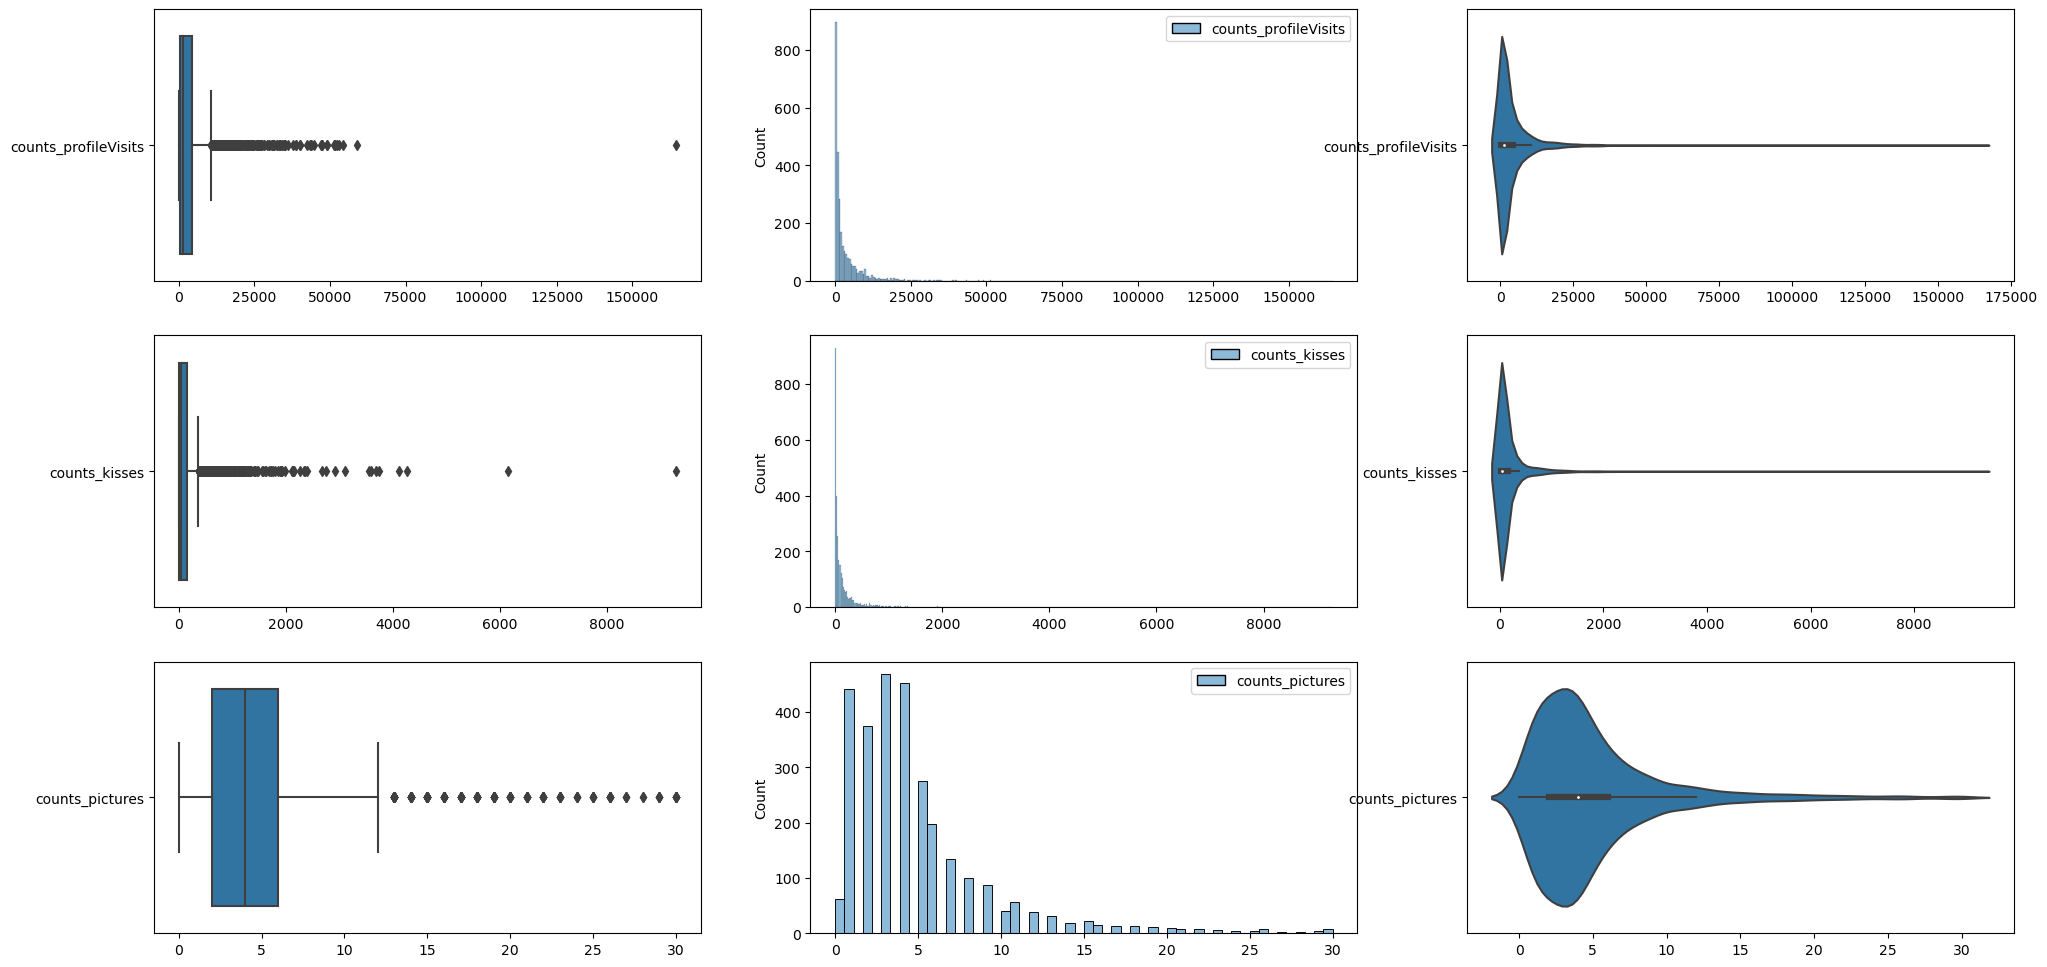

In [10]:
f, axes = plt.subplots(3, 3, figsize=(24, 12))

# Plot the basic uni-variate figures for profilevisit counts
sb.boxplot(data = counts_profileVisits, orient = "h", ax = axes[0,0])
sb.histplot(data = counts_profileVisits, ax = axes[0,1])
sb.violinplot(data = counts_profileVisits, orient = "h", ax = axes[0,2])

# Plot the basic uni-variate figures for kisses count
sb.boxplot(data = counts_kisses, orient = "h", ax = axes[1,0])
sb.histplot(data = counts_kisses, ax = axes[1,1])
sb.violinplot(data = counts_kisses, orient = "h", ax = axes[1,2])

# Plot the basic uni-variate figures for count of pictures
sb.boxplot(data = counts_pictures, orient = "h", ax = axes[2,0])
sb.histplot(data = counts_pictures, ax = axes[2,1])
sb.violinplot(data = counts_pictures, orient = "h", ax = axes[2,2])

In [11]:
jointDFvisits = pd.concat([counts_profileVisits, counts_kisses], axis = 1).reindex(counts_profileVisits.index)
jointDFvisits

,counts_profileVisits,counts_kisses
0,8279,239
1,663,13
2,22187,1015
3,7339,180
4,18672,492
...,...,...
2914,1101,46
2915,8681,141
2916,8682,141
2917,8702,142


In [12]:
jointDFpic = pd.concat([counts_pictures, counts_kisses], axis = 1).reindex(counts_profileVisits.index)
jointDFpic

,counts_pictures,counts_kisses
0,4,239
1,5,13
2,3,1015
3,18,180
4,13,492
...,...,...
2914,8,46
2915,8,141
2916,8,141
2917,8,142


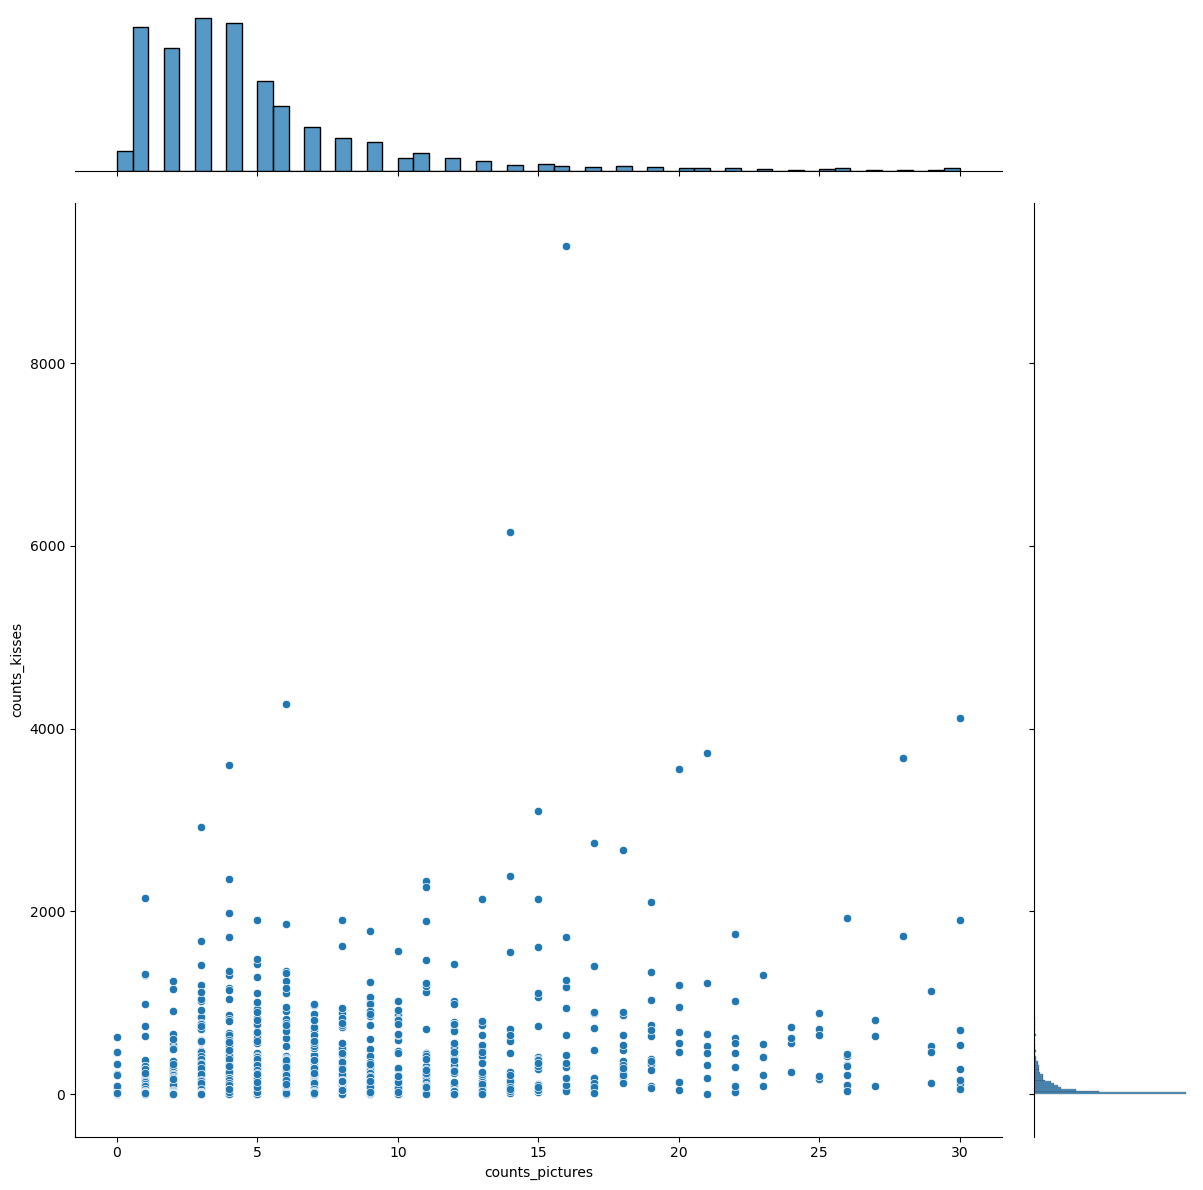

In [13]:
sb.jointplot(data = jointDFpic, x = "counts_pictures", y = "counts_kisses", height = 12)

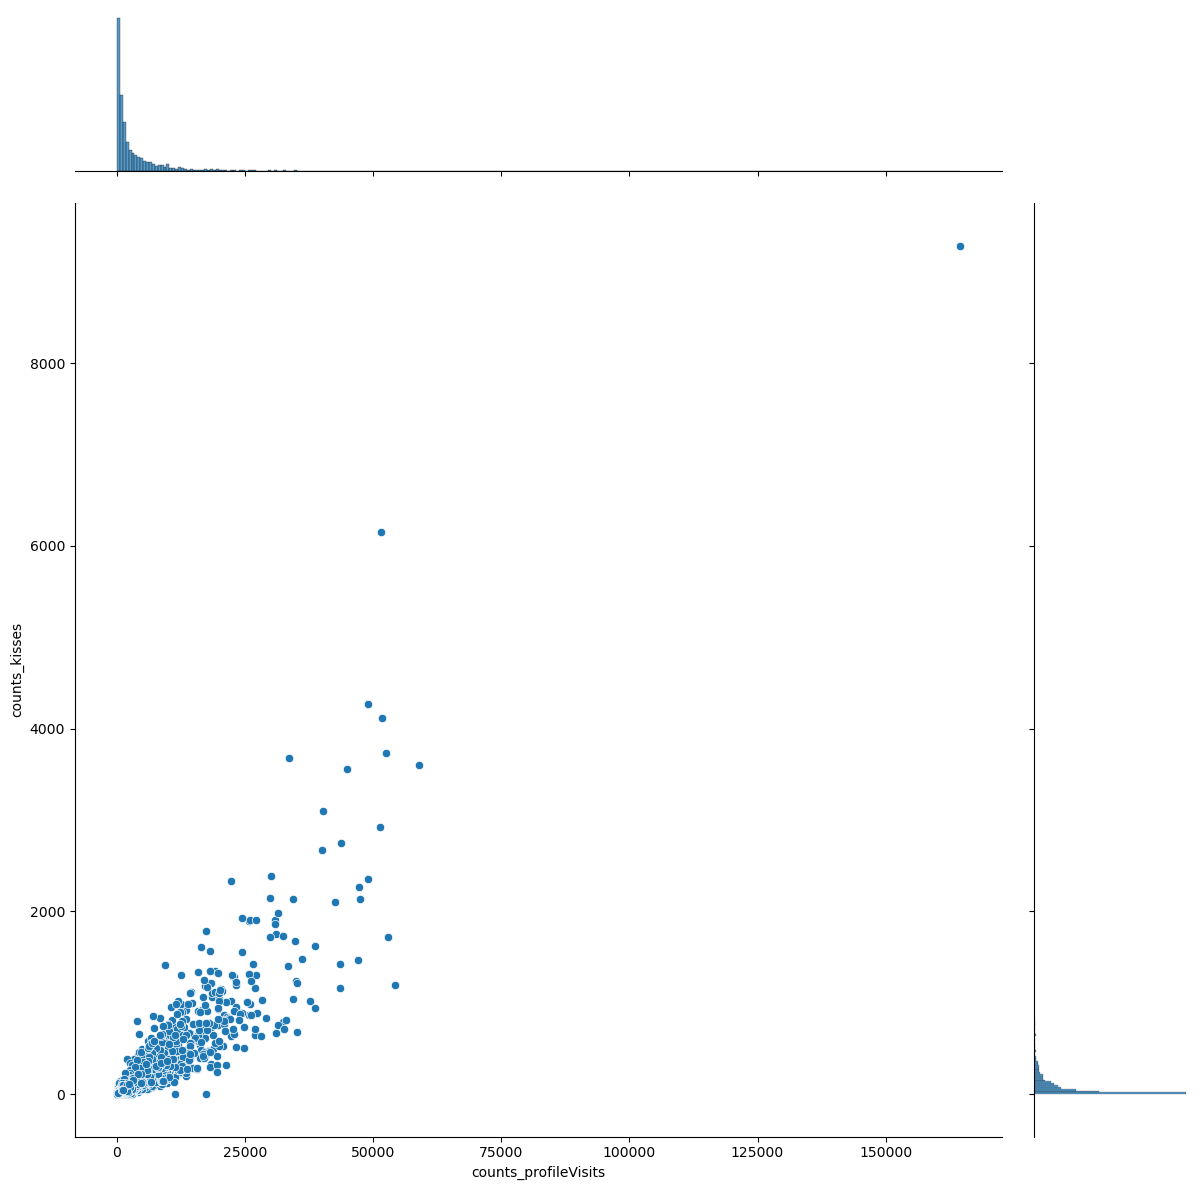

In [14]:
sb.jointplot(data = jointDFvisits, x = "counts_profileVisits", y = "counts_kisses", height = 12)

<Axes: >

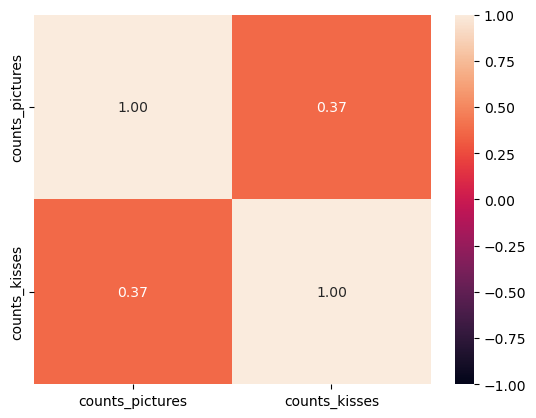

In [15]:
sb.heatmap(jointDFpic.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

sb.heatmap(jointDFvisits.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

# Muti-varible exploration
use counts_details, counts_pictures and counts_profileVisits to predict counts_kisses

In [16]:
y = pd.DataFrame(lovoo_api["counts_kisses"])
X = pd.DataFrame(lovoo_api[["counts_details", "counts_pictures", "counts_profileVisits"]])

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

Train Set : (2979, 1) (2979, 3)
Test Set  : (994, 1) (994, 3)


In [18]:
y_train.describe()

,counts_kisses
count,2979.000000
mean,155.990937
std,382.225410
min,0.000000
25%,11.000000
50%,43.000000
75%,138.500000
max,9288.000000


In [19]:
X_train.describe()

,counts_details,counts_pictures,counts_profileVisits
count,2979.000000,2979.000000,2979.000000
mean,0.566925,4.746895,3690.980195
std,0.326028,4.380844,7029.718456
min,0.000000,0.000000,0.000000
25%,0.310000,2.000000,371.500000
50%,0.620000,4.000000,1220.000000
75%,0.850000,6.000000,3950.500000
max,1.000000,30.000000,164425.000000


<Axes: >

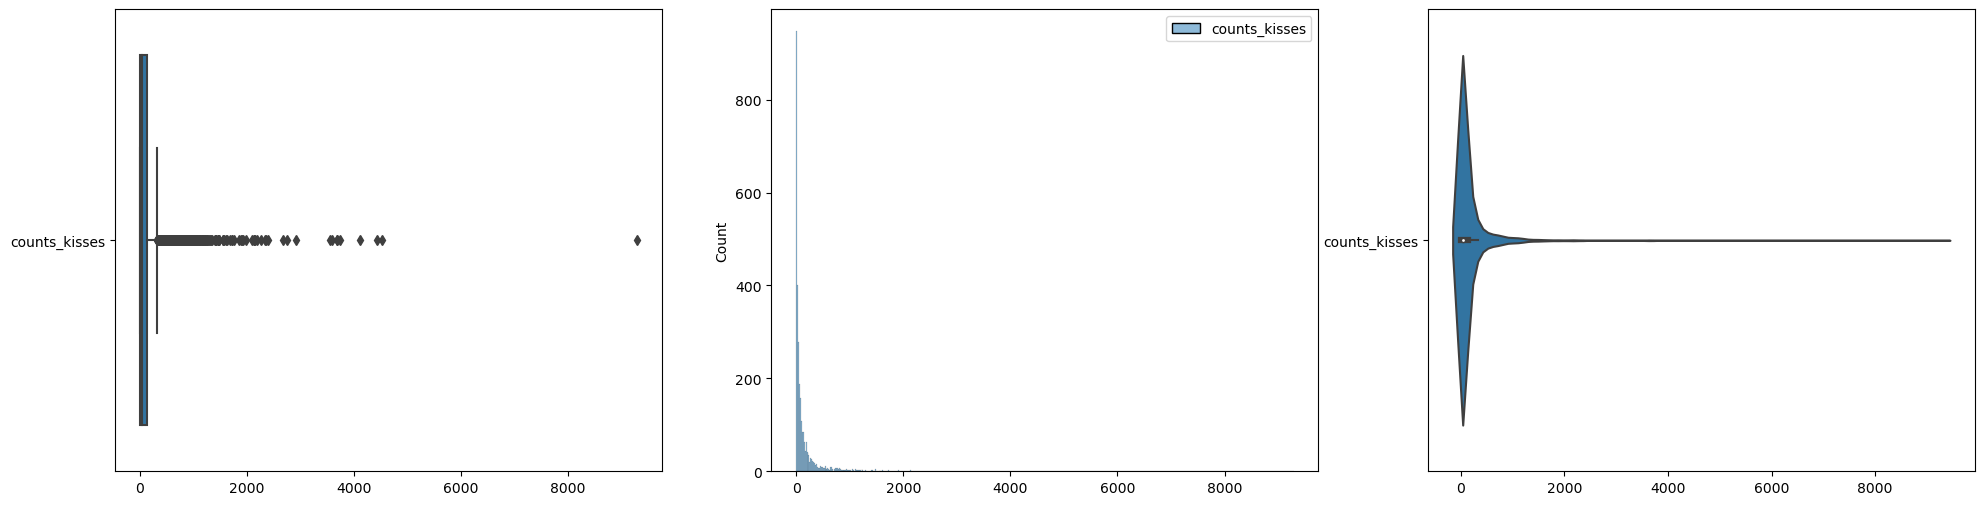

In [20]:
f, axes = plt.subplots(1, 3, figsize=(24, 6))
sb.boxplot(data = y_train, orient = "h", ax = axes[0])
sb.histplot(data = y_train, ax = axes[1])
sb.violinplot(data = y_train, orient = "h", ax = axes[2])

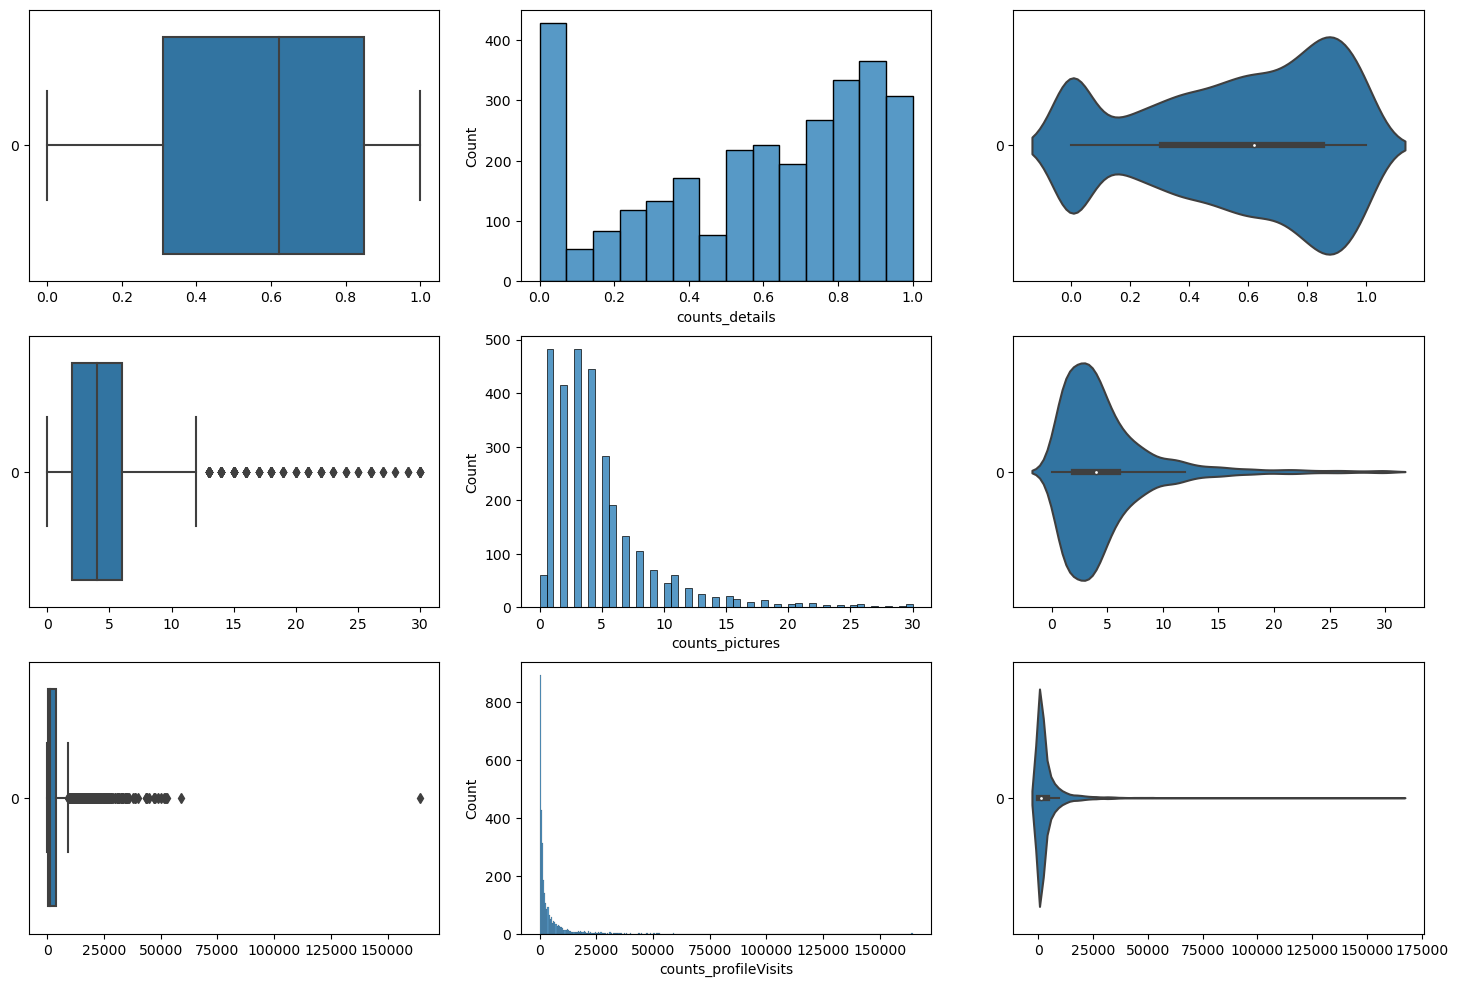

In [21]:
f, axes = plt.subplots(3, 3, figsize=(18, 12))

count = 0
for var in X_train:
    sb.boxplot(data = X_train[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = X_train[var], ax = axes[count,1])
    sb.violinplot(data = X_train[var], orient = "h", ax = axes[count,2])
    count += 1

<Axes: >

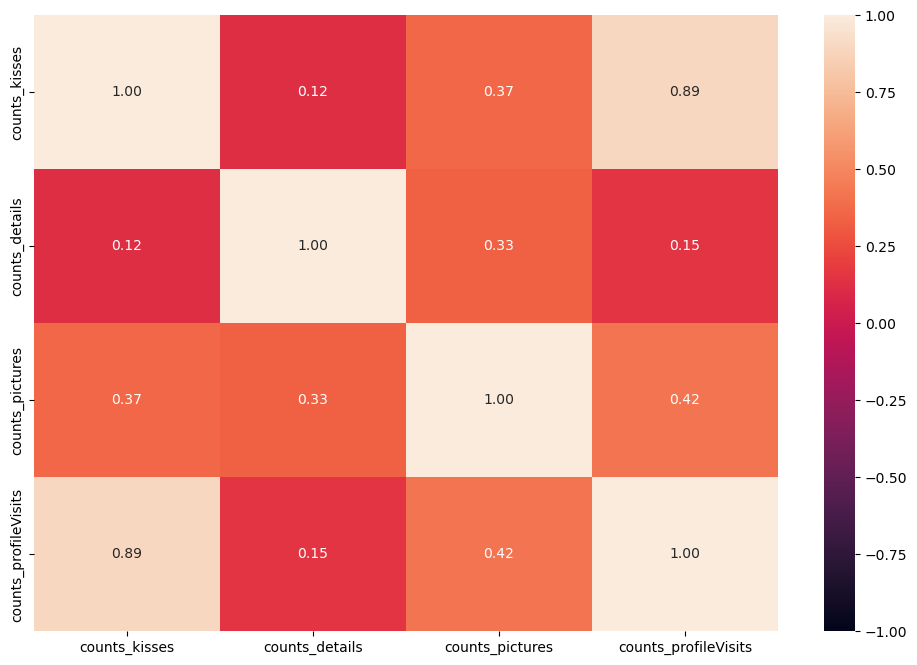

In [22]:
trainDF = pd.concat([y_train, X_train], axis = 1).reindex(y_train.index)

f = plt.figure(figsize=(12, 8))
sb.heatmap(trainDF.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

C:\Users\24119\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


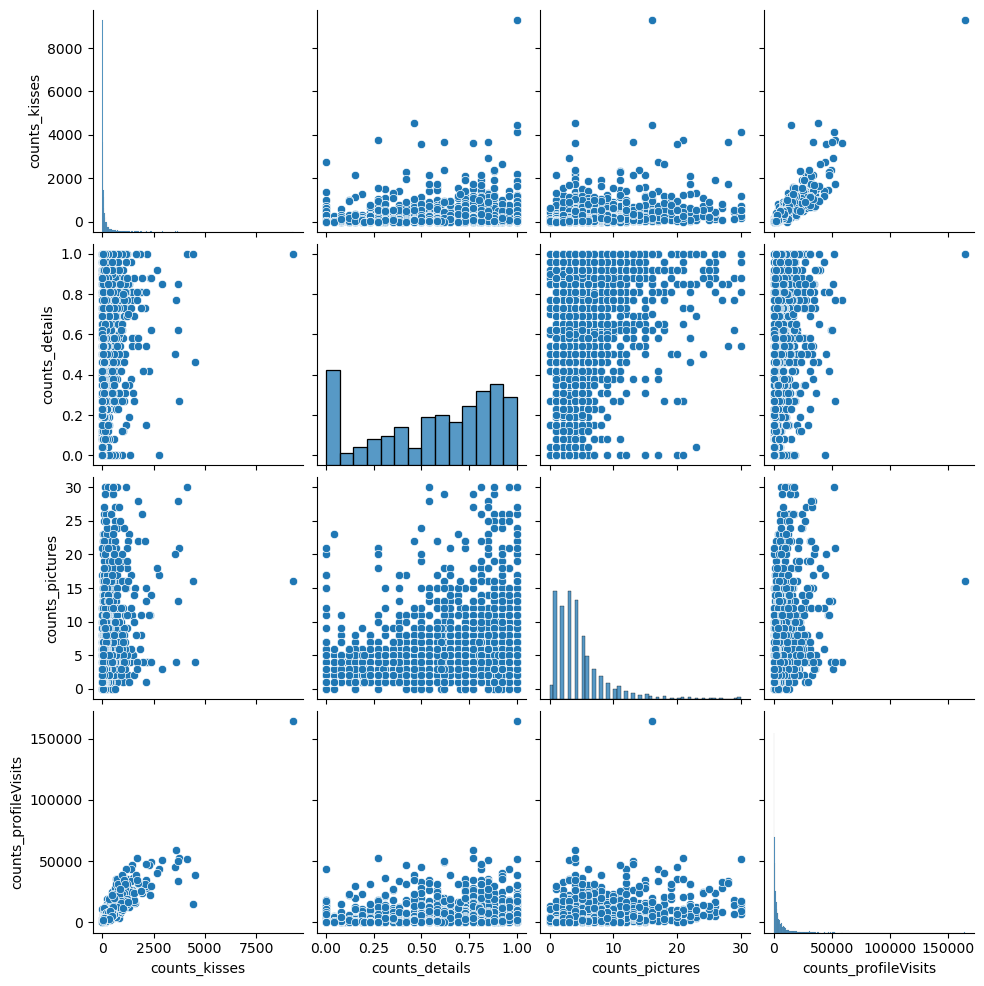

In [23]:
sb.pairplot(data = trainDF)

### Linear regression 

In [24]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()         
linreg.fit(X_train, y_train)        

print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"])

Intercept of Regression 	: b =  [-13.31842779]
Coefficients of Regression 	: a =  [[-14.4231227   -0.64088654   0.0489107 ]]



,Predictors,Coefficients
0,counts_details,-14.423123
1,counts_pictures,-0.640887
2,counts_profileVisits,0.048911


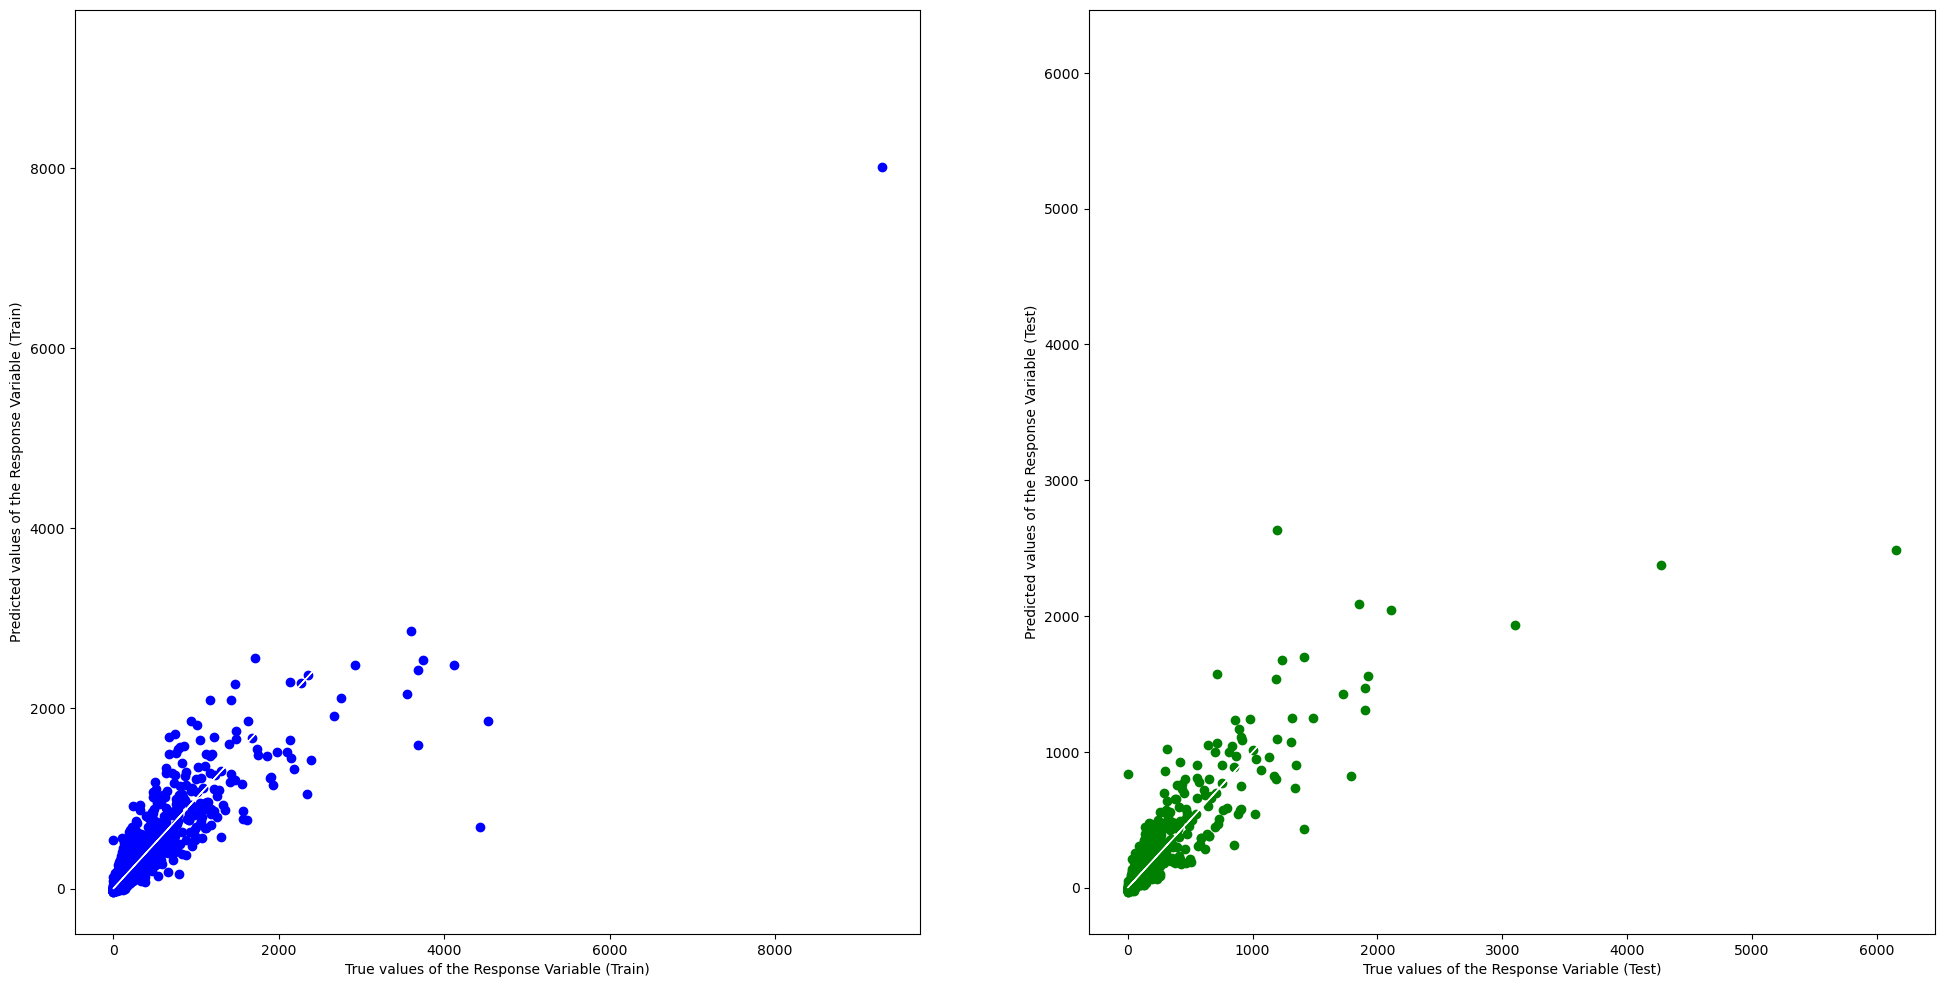

In [25]:
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

### Goodness fit of the model

In [26]:
from sklearn.metrics import mean_squared_error

print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.8005135316209142
Mean Squared Error (MSE) 	: 29134.44456129962

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.7333652978439642
Mean Squared Error (MSE) 	: 35921.482801331265



### Exploraing relationship between distance and counts kisses

#### Catergorising Distance by group



In [27]:
distance = pd.DataFrame(lovoo_instances['distance'])
distance.describe()

,distance
count,2919.000000
mean,176.534909
std,209.282646
min,0.000000
25%,66.750000
50%,150.000000
75%,229.000000
max,6918.000000


In [28]:
category_counts = {"Near": 0, "Medium": 0, "Far": 0}

for distance in lovoo_instances['distance']:
    if distance < 150:
        distance_category = "Near"
    elif 150 <= distance <= 230:
        distance_category = "Medium"
    else:
        distance_category = "Far"

    category_counts[distance_category] += 1

# Print out the count of each category
for category, count in category_counts.items():
    print(f"{category}: {count}")

def categorize_distance(distance):
    if distance < 150:
        return "Near"
    elif 150 <= distance <= 230:
        return "Medium"
    else:
        return "Far"

lovoo_instances['distance_category'] = lovoo_instances['distance'].apply(categorize_distance)

Near: 1458
Medium: 738
Far: 723


In [29]:
lovoo_instances.head()

,index,gender,age,name,counts_pictures,counts_profileVisits,counts_kisses,flirtInterests_chat,flirtInterests_friends,flirtInterests_date,...,highlighted,distance,locked,mobile,online,whazzup,pictureId,userId,isSystemProfile,distance_category
0,0,F,25,daeni,4,8279,239,True,True,True,...,False,175.000000,False,True,False,Nur tote fische schwimmen mit dem strom,4e3842f79b70e7ea57000064,55303fc3160ba0eb728b4575,False,Medium
1,1,F,22,italiana 92,5,663,13,True,True,True,...,False,138.000000,False,True,False,Primaveraaa<3,4e3d34bf5d2bce7b160006a3,552e7b61c66da10d1e8b4c82,False,Near
2,2,F,20,Qqkwmdowlo,3,22187,1015,True,True,False,...,False,77.300003,False,False,False,Je pense donc je suis. Instagram quedev,4eef8b81ebf2c8f64000000c,54c92738076ea1b5338b4735,False,Near
3,3,F,24,Baby dee,18,7339,180,True,False,True,...,False,194.000000,False,True,True,Wicked Wonderland💕❤️,4ef9434cca61bece6a000002,54f2b4ce0b6ea1177e8b4d18,False,Medium
4,4,F,24,Anna,13,18672,492,False,True,False,...,False,318.000000,False,True,True,💚 ✅ Instagram : anna_lem0n,4f10cbc1883fa97a5f000015,54ecbb39170ba08b488b4aa5,False,Far


#### Grouping boonlean variable about "flirtinterest", combining "flirtInterests_chat", "flirtInterests_friends","flirtInterests_date" as flirtinterest. The interest increases as the number of functions opned increases. The min is 0 and max is 3.

In [30]:
def calculate_flirtinterest(row):
    interests = row[['flirtInterests_chat', 'flirtInterests_friends', 'flirtInterests_date']]
    count_true = interests.sum()
    if count_true == 1:
        return 1
    elif count_true == 3:
        return 3
    else:
        return count_true  # This case covers count_true = 0, 2

# Apply the function to create a new column 'flirtinterest'
lovoo_instances['flirtinterest'] = lovoo_instances.apply(calculate_flirtinterest, axis=1)

In [31]:
lovoo_instances.head()

,index,gender,age,name,counts_pictures,counts_profileVisits,counts_kisses,flirtInterests_chat,flirtInterests_friends,flirtInterests_date,...,distance,locked,mobile,online,whazzup,pictureId,userId,isSystemProfile,distance_category,flirtinterest
0,0,F,25,daeni,4,8279,239,True,True,True,...,175.000000,False,True,False,Nur tote fische schwimmen mit dem strom,4e3842f79b70e7ea57000064,55303fc3160ba0eb728b4575,False,Medium,3
1,1,F,22,italiana 92,5,663,13,True,True,True,...,138.000000,False,True,False,Primaveraaa<3,4e3d34bf5d2bce7b160006a3,552e7b61c66da10d1e8b4c82,False,Near,3
2,2,F,20,Qqkwmdowlo,3,22187,1015,True,True,False,...,77.300003,False,False,False,Je pense donc je suis. Instagram quedev,4eef8b81ebf2c8f64000000c,54c92738076ea1b5338b4735,False,Near,2
3,3,F,24,Baby dee,18,7339,180,True,False,True,...,194.000000,False,True,True,Wicked Wonderland💕❤️,4ef9434cca61bece6a000002,54f2b4ce0b6ea1177e8b4d18,False,Medium,2
4,4,F,24,Anna,13,18672,492,False,True,False,...,318.000000,False,True,True,💚 ✅ Instagram : anna_lem0n,4f10cbc1883fa97a5f000015,54ecbb39170ba08b488b4aa5,False,Far,1


#### Catergorsing count kisses by group

In [32]:
counts_kisses.describe()

,counts_kisses
count,2919.000000
mean,166.207263
std,393.546556
min,0.000000
25%,13.000000
50%,48.000000
75%,156.000000
max,9288.000000


In [33]:
kisses_category = {"Low": 0, "Medium": 0, "High": 0}

# Correct loop to categorize 'count_kisses' and count instances
for count_kisses in lovoo_instances['counts_kisses']:
    if count_kisses < 13:
        category = "Low"
    elif 13 <= count_kisses <= 156:
        category = "Medium"
    else:
        category = "High"

    kisses_category[category] += 1

# Print out the count of each category for 'count_kisses'
print("Counts for each 'counts_kisses' category:")
for category, count in kisses_category.items():
    print(f"{category}: {count}")

# Function to categorize 'distance'
def kisses_category(counts_kisses):
    if counts_kisses < 13:
        return "low"
    elif 13 <= distance <= 156:
        return "Medium"
    else:
        return "High"

# Apply the function to create a new 'distance_category' column
lovoo_instances['kisses_category'] = lovoo_instances['counts_kisses'].apply(kisses_category)

lovoo_instances.head()

Counts for each 'counts_kisses' category:
Low: 726
Medium: 1466
High: 727


,index,gender,age,name,counts_pictures,counts_profileVisits,counts_kisses,flirtInterests_chat,flirtInterests_friends,flirtInterests_date,...,locked,mobile,online,whazzup,pictureId,userId,isSystemProfile,distance_category,flirtinterest,kisses_category
0,0,F,25,daeni,4,8279,239,True,True,True,...,False,True,False,Nur tote fische schwimmen mit dem strom,4e3842f79b70e7ea57000064,55303fc3160ba0eb728b4575,False,Medium,3,High
1,1,F,22,italiana 92,5,663,13,True,True,True,...,False,True,False,Primaveraaa<3,4e3d34bf5d2bce7b160006a3,552e7b61c66da10d1e8b4c82,False,Near,3,High
2,2,F,20,Qqkwmdowlo,3,22187,1015,True,True,False,...,False,False,False,Je pense donc je suis. Instagram quedev,4eef8b81ebf2c8f64000000c,54c92738076ea1b5338b4735,False,Near,2,High
3,3,F,24,Baby dee,18,7339,180,True,False,True,...,False,True,True,Wicked Wonderland💕❤️,4ef9434cca61bece6a000002,54f2b4ce0b6ea1177e8b4d18,False,Medium,2,High
4,4,F,24,Anna,13,18672,492,False,True,False,...,False,True,True,💚 ✅ Instagram : anna_lem0n,4f10cbc1883fa97a5f000015,54ecbb39170ba08b488b4aa5,False,Far,1,High


#### Test the independency between kisses_category againest flirtinterest and distace categorty using chi_test





#### cross_tabulation

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import statsmodels.api as sm
from statsmodels.formula.api import ols, logit

# Example of cross-tabulation for distance_category and kisses_category
cross_tab_distance_kisses = pd.crosstab(lovoo_instances['distance_category'], lovoo_instances['kisses_category'])
print(cross_tab_distance_kisses)

# Example of cross-tabulation for flirt_interest and kisses_category
cross_tab_flirt_kisses = pd.crosstab(lovoo_instances['flirtinterest'], lovoo_instances['kisses_category'])
print(cross_tab_flirt_kisses)

kisses_category    High  low
distance_category           
Far                 435  288
Medium              612  126
Near               1146  312
kisses_category  High  low
flirtinterest             
0                 170  132
1                 941  264
2                 502  161
3                 580  169


#### Distance Category vs. Kisses Category:
#### The majority of "High" kisses_category observations occur when the distance_category is "Near."
#### As the distance_category increases from "Near" to "Far," the number of "High" kisses_category observations decreases.
#### The "Medium" distance category has a significantly higher ratio of "High" to "low" kisses_category compared to "Far" and "Near."
#### Flirt Interest vs. Kisses Category:
#### The highest count of "High" kisses_category is observed when flirt_interest is 1, followed by 3, 2, and 0 in descending order.
#### The ratio of "High" to "low" kisses_category tends to increase with the flirt_interest level (not strictly linear due to the count at level 1 being the highest).

In [36]:
from scipy.stats import chi2_contingency

# Chi-Square Test for distance_category and kisses_category
chi2_stat, p_val, dof, ex = chi2_contingency(cross_tab_distance_kisses)
print(f"Chi-Square Test between distance_category and kisses_category: p-value = {p_val}")

# Chi-Square Test for flirtinterest and kisses_category
chi2_stat, p_val, dof, ex = chi2_contingency(cross_tab_flirt_kisses)
print(f"Chi-Square Test between flirtinterest and kisses_category: p-value = {p_val}")

Chi-Square Test between distance_category and kisses_category: p-value = 8.534879344960494e-27
Chi-Square Test between flirtinterest and kisses_category: p-value = 4.395270023434053e-14


#### The very small p-values for both tests (far less than the conventional threshold of 0.05) suggest that both distance_category and flirtinterest have statistically significant associations with kisses_category. This indicates that these are not independent and there is likely some relationship affecting the kisses_category.

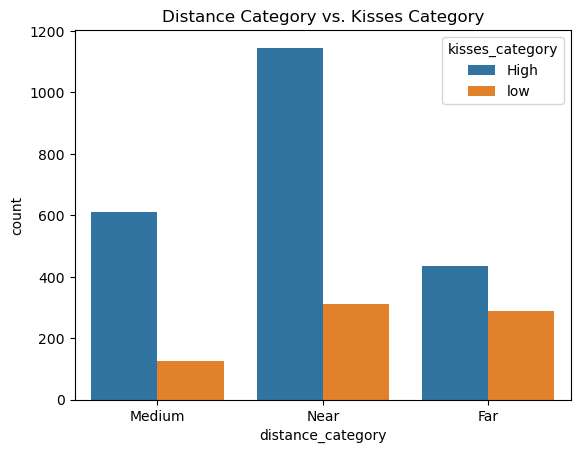

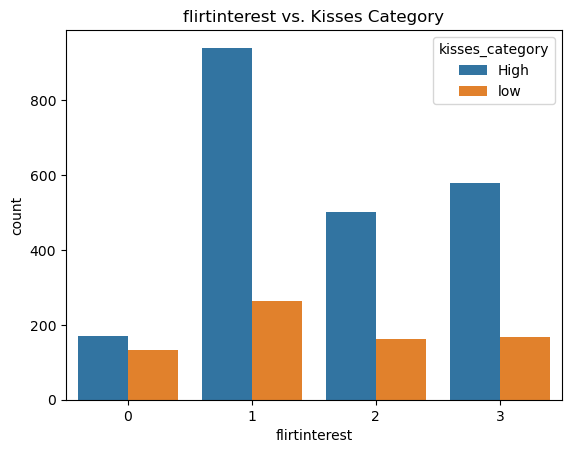

In [37]:
sns.countplot(x='distance_category', hue='kisses_category', data=lovoo_instances)
plt.title('Distance Category vs. Kisses Category')
plt.show()

# Stacked Bar Chart for flirt_interest vs. kisses_category
sns.countplot(x='flirtinterest', hue='kisses_category', data=lovoo_instances)
plt.title('flirtinterest vs. Kisses Category')
plt.show()

#### The bar charts visually confirm the patterns observed in the cross-tabulations.The Distance Category vs. Kisses Category chart shows that a "Near" distance category has the highest count for "High" kisses_category.
#### The Flirt Interest vs. Kisses Category chart indicates that a flirt_interest of 1 corresponds to the highest count for "High" kisses_category, although the distribution is not strictly increasing with flirt_interest level.

In [38]:
# Convert kisses_category to a binary outcome for simplicity
lovoo_instances['kisses_binary'] = (lovoo_instances['kisses_category'] == 'High').astype(int)

# Fit a logistic regression model
# Assuming flirt_interest and distance_category are categorical, use C() to indicate categorical variables in the formula
model = logit("kisses_binary ~ C(flirtinterest) + C(distance_category)", data=lovoo_instances).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.532054
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:          kisses_binary   No. Observations:                 2919
Model:                          Logit   Df Residuals:                     2913
Method:                           MLE   Df Model:                            5
Date:                Tue, 23 Apr 2024   Pseudo R-squ.:                 0.05146
Time:                        12:16:09   Log-Likelihood:                -1553.1
converged:                       True   LL-Null:                       -1637.3
Covariance Type:            nonrobust   LLR p-value:                 1.512e-34
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                         -0.4138      0.135     -3.055     

#### The positive coefficients for flirt_interest levels 1, 2, and 3 suggest that as flirt_interest increases, the log-odds of being in the "High" kisses_category also increase, compared to a baseline flirt_interest of 0.
#### The positive coefficients for distance_category "Medium" and "Near" suggest that these categories are associated with a higher likelihood of being in the "High" kisses_category compared to the baseline "Far" category.
#### The p-values for all coefficients of flirt_interest and distance_category "Medium" and "Near" are less than 0.05, indicating that these findings are statistically significant.


#### a higher flirt interest and a closer distance category affect the kisses category positively.
#### For targeted strategies or interventions, focusing on enhancing flirt interest and facilitating closer interactions may increase the likelihood of higher engagement in the context of the kisses_category.

#### explore the effect of gender diffrernce on counts_kisses

In [39]:
lovoo_instances["gender"].value_counts()

gender
F    2919
Name: count, dtype: int64

In [40]:
lovoo_api["gender"].value_counts()

gender
F    3973
Name: count, dtype: int64

In [41]:
lovoo_api["genderLooking"].value_counts()

genderLooking
M       3561
none     366
F         25
both      21
Name: count, dtype: int64

# Which factors effect different people`s charm that can be judged by count_kisses

# 1.counts_profileVisits

In [83]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
import numpy as np
sb.set() 

In [85]:
appdata = pd.read_csv('lovoo_v3_users_instances.csv')
appdata.head()

,index,gender,age,name,counts_pictures,counts_profileVisits,counts_kisses,flirtInterests_chat,flirtInterests_friends,flirtInterests_date,...,hasBirthday,highlighted,distance,locked,mobile,online,whazzup,pictureId,userId,isSystemProfile
0,0,F,25,daeni,4,8279,239,True,True,True,...,False,False,175.000000,False,True,False,Nur tote fische schwimmen mit dem strom,4e3842f79b70e7ea57000064,55303fc3160ba0eb728b4575,False
1,1,F,22,italiana 92,5,663,13,True,True,True,...,False,False,138.000000,False,True,False,Primaveraaa<3,4e3d34bf5d2bce7b160006a3,552e7b61c66da10d1e8b4c82,False
2,2,F,20,Qqkwmdowlo,3,22187,1015,True,True,False,...,False,False,77.300003,False,False,False,Je pense donc je suis. Instagram quedev,4eef8b81ebf2c8f64000000c,54c92738076ea1b5338b4735,False
3,3,F,24,Baby dee,18,7339,180,True,False,True,...,False,False,194.000000,False,True,True,Wicked Wonderland💕❤️,4ef9434cca61bece6a000002,54f2b4ce0b6ea1177e8b4d18,False
4,4,F,24,Anna,13,18672,492,False,True,False,...,False,False,318.000000,False,True,True,💚 ✅ Instagram : anna_lem0n,4f10cbc1883fa97a5f000015,54ecbb39170ba08b488b4aa5,False


In [86]:
profilevisits = pd.DataFrame(appdata['counts_profileVisits'])  
kisses = pd.DataFrame(appdata['counts_kisses'])    

In [87]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(profilevisits, kisses, test_size = 0.25)

In [88]:
trainDF = pd.concat([X_train, y_train], axis = 1).reindex(X_train.index)

<Axes: >

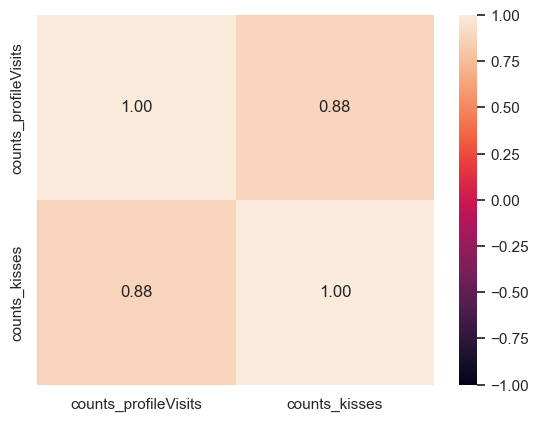

In [89]:
sb.heatmap(trainDF.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

In [90]:
linreg = LinearRegression()

In [91]:
linreg.fit(X_train, y_train)

LinearRegression()

In [92]:
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

Intercept 	: b =  [-23.75763206]
Coefficients 	: a =  [[0.04884094]]


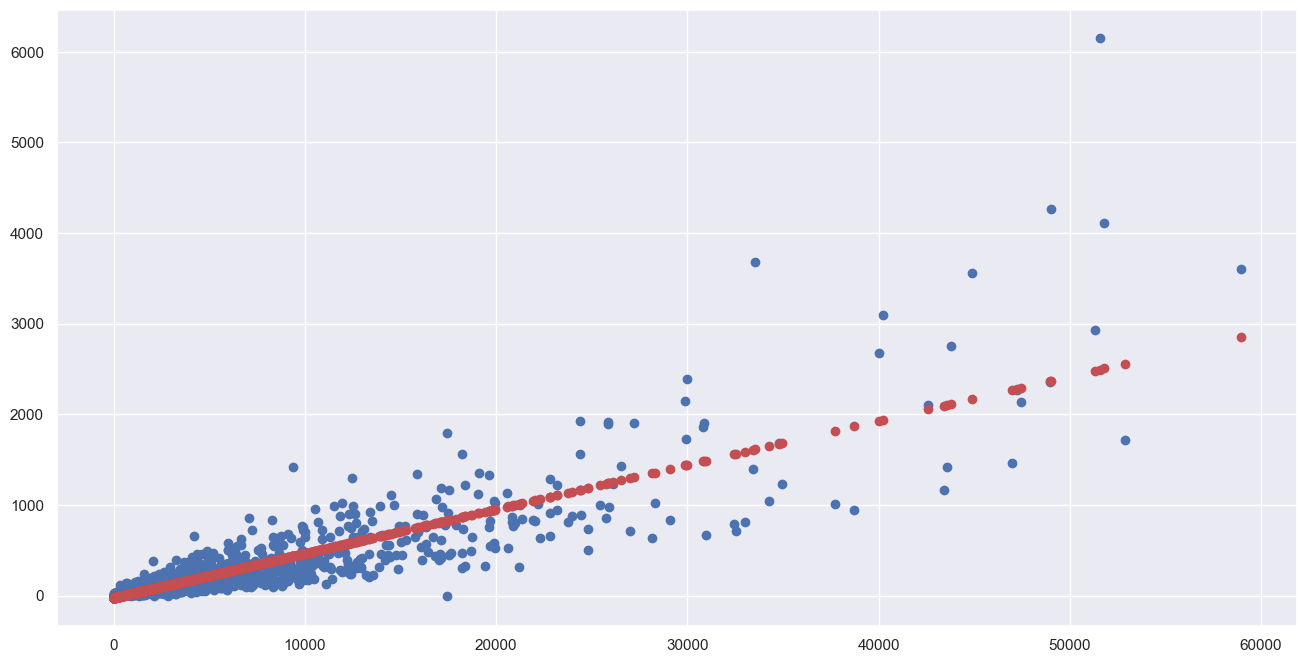

In [93]:
y_train_pred = linreg.predict(X_train)


f = plt.figure(figsize=(16, 8))
plt.scatter(X_train, y_train)
plt.scatter(X_train, y_train_pred, color = "r")
plt.show()

# From the heatmap and Linear Regression model, we can find that there is a strong correlation between counts_kisses and counts_profileVisits that means the more counts_profileVisits is, the higher counts_kisses is.

# 2.countDetails

In [94]:
details = pd.DataFrame(appdata['countDetails'])  
kisses = pd.DataFrame(appdata['counts_kisses']) 

In [95]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(details, kisses, test_size = 0.25)

In [96]:
trainDF = pd.concat([X_train, y_train], axis = 1).reindex(X_train.index)

<Axes: >

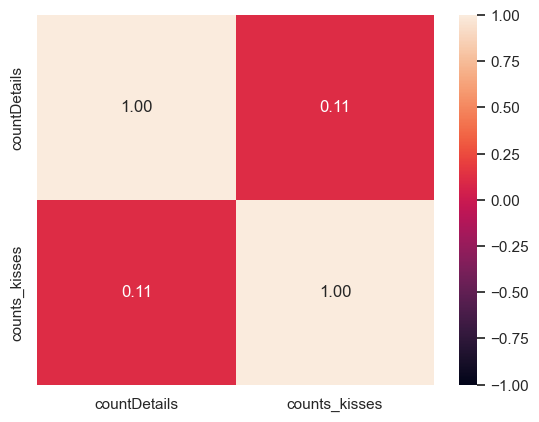

In [97]:
sb.heatmap(trainDF.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

# From the heatmap , we can find that there is not a strong correlation between counts_kisses and countsDetails that means whether the countdetails are comprehensive or not, the number of count_kisses doesn`t matter too match. 

# 3.Distance

In [98]:
np.random.seed(0)
n_samples = 1000
distance = np.random.uniform(0, 10, n_samples)
kisses = np.random.randint(0, 100, n_samples)

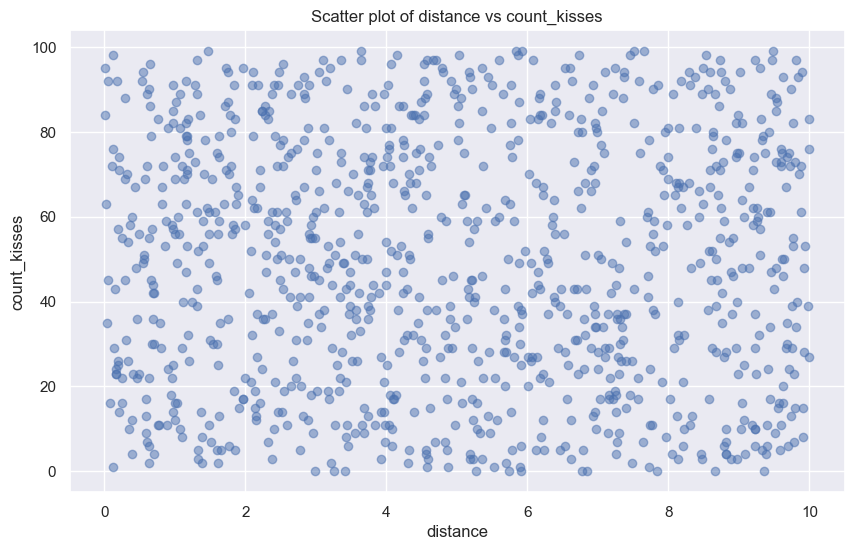

In [99]:
plt.figure(figsize=(10, 6))
plt.scatter(distance, kisses, alpha=0.5)
plt.title('Scatter plot of distance vs count_kisses')
plt.xlabel('distance')
plt.ylabel('count_kisses')
plt.grid(True)
plt.show()

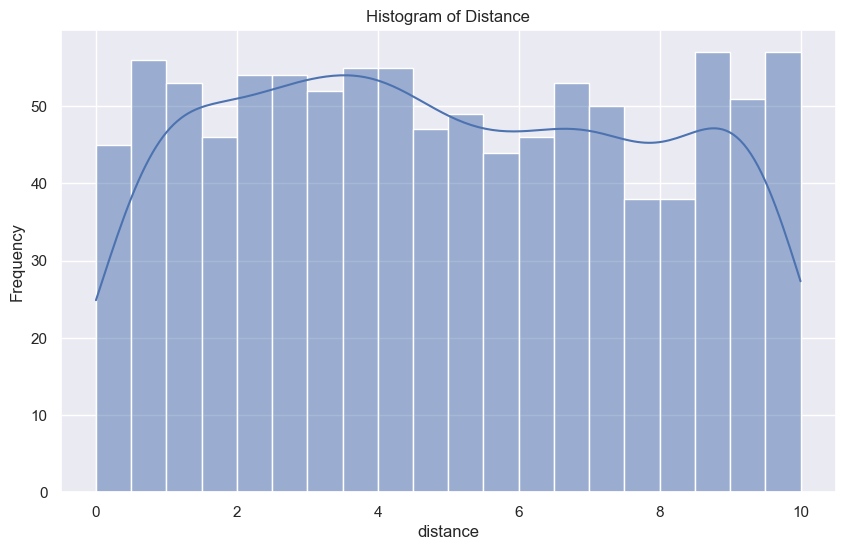

In [100]:
plt.figure(figsize=(10, 6))
sb.histplot(distance, bins=20, kde=True)
plt.title('Histogram of Distance')
plt.xlabel('distance')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Coefficient: -0.17409148871823163
Intercept: 50.185357182062134


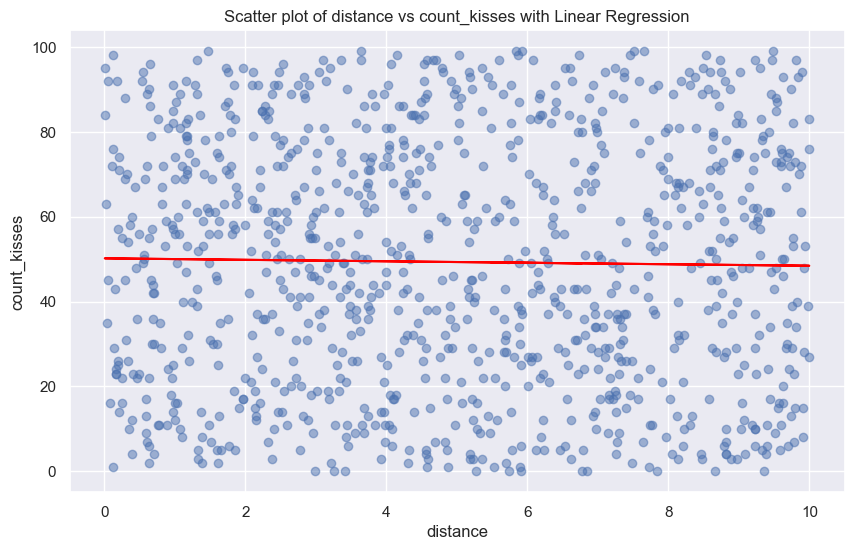

In [101]:
model = LinearRegression()
model.fit(distance.reshape(-1, 1), kisses)


print("Coefficient:", model.coef_[0])
print("Intercept:", model.intercept_)


plt.figure(figsize=(10, 6))
plt.scatter(distance, kisses, alpha=0.5)
plt.plot(distance, model.predict(distance.reshape(-1, 1)), color='red')
plt.title('Scatter plot of distance vs count_kisses with Linear Regression')
plt.xlabel('distance')
plt.ylabel('count_kisses')
plt.grid(True)
plt.show()

# From the scatter plot of distance vs count_kisses, we can find that count_kisses = -0.174*distances +50.185 that means when distances = 0, count_kisses = 50.185,and when distances grow longer and longer, count_kisses will decrease lower and lower. (It can not be ignored that there are some special datasets)

# Decision tree of filterinterest_category

In [62]:
lovoo_api = pd.read_csv('lovoo_v3_users_api-results.csv')
lovoo_api.head()

,index,gender,genderLooking,age,name,counts_details,counts_pictures,counts_profileVisits,counts_kisses,counts_fans,...,shareProfileEnabled,lastOnlineDate,lastOnlineTime,birthd,crypt,freetext,whazzup,pictureId,userId,isSystemProfile
0,0,F,M,25,daeni,1.00,4,8279,239,0,...,1,2015-04-25T20:43:26Z,1.429995e+09,0,NaN,Nur tote Fisch schwimmen mit dem Strom,Nur tote fische schwimmen mit dem strom,4e3842f79b70e7ea57000064,55303fc3160ba0eb728b4575,NaN
1,1,F,M,22,italiana 92,0.85,5,663,13,0,...,1,2015-04-26T09:19:35Z,1.430040e+09,0,NaN,NaN,Primaveraaa<3,4e3d34bf5d2bce7b160006a3,552e7b61c66da10d1e8b4c82,NaN
2,2,F,M,21,Lauraaa,0.00,4,1369,88,0,...,1,2015-04-06T14:24:07Z,1.428330e+09,0,NaN,NaN,NaN,4ec96c090dc82cb25d00000a,54a584ecc56da128638b4674,NaN
3,3,F,none,20,Qqkwmdowlo,0.12,3,22187,1015,2,...,1,2015-04-07T11:21:01Z,1.428406e+09,0,NaN,NaN,Je pense donc je suis. Instagram quedev,4eef8b81ebf2c8f64000000c,54c92738076ea1b5338b4735,NaN
4,4,F,M,21,schaessie {3,0.15,12,35262,1413,9,...,1,2015-04-06T14:25:20Z,1.428330e+09,0,NaN,NaN,Instagram: JESSSIESCH,4ef3cc5aa9d0b3d07d000017,54e1a6f6c76da135748b4a3a,NaN


In [63]:
chat = pd.DataFrame(lovoo_api['flirtInterests_chat'])  # Response
kisses = pd.DataFrame(lovoo_api['counts_kisses'])      # Predictor

In [64]:
kisses_train = pd.DataFrame(kisses[:600])
chat_train = pd.DataFrame(chat[:600])

# Test Set : 200 samples
kisses_test = pd.DataFrame(kisses[-200:])
chat_test = pd.DataFrame(chat[-200:])

# Check the sample sizes
print("Train Set :", chat_train.shape, kisses_train.shape)
print("Test Set  :", chat_test.shape, kisses_test.shape)

Train Set : (600, 1) (600, 1)
Test Set  : (200, 1) (200, 1)


In [65]:
chat_train["flirtInterests_chat"].value_counts()

flirtInterests_chat
True     428
False    172
Name: count, dtype: int64

In [66]:
kisses_train.describe()

,counts_kisses
count,600.000000
mean,550.341667
std,784.061334
min,0.000000
25%,110.500000
50%,297.000000
75%,733.250000
max,9288.000000


C:\Users\24119\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


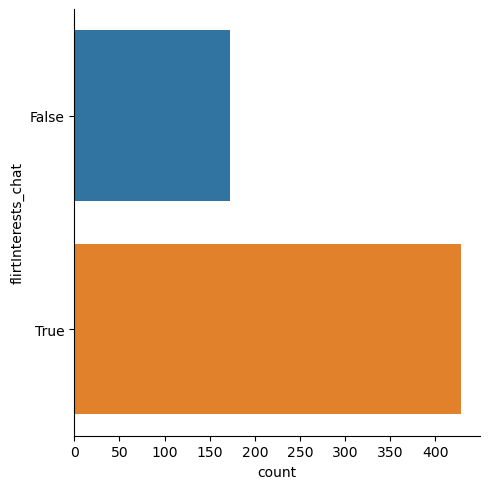

In [67]:
sb.catplot(y = "flirtInterests_chat", data = chat_train, kind = "count")

<Axes: >

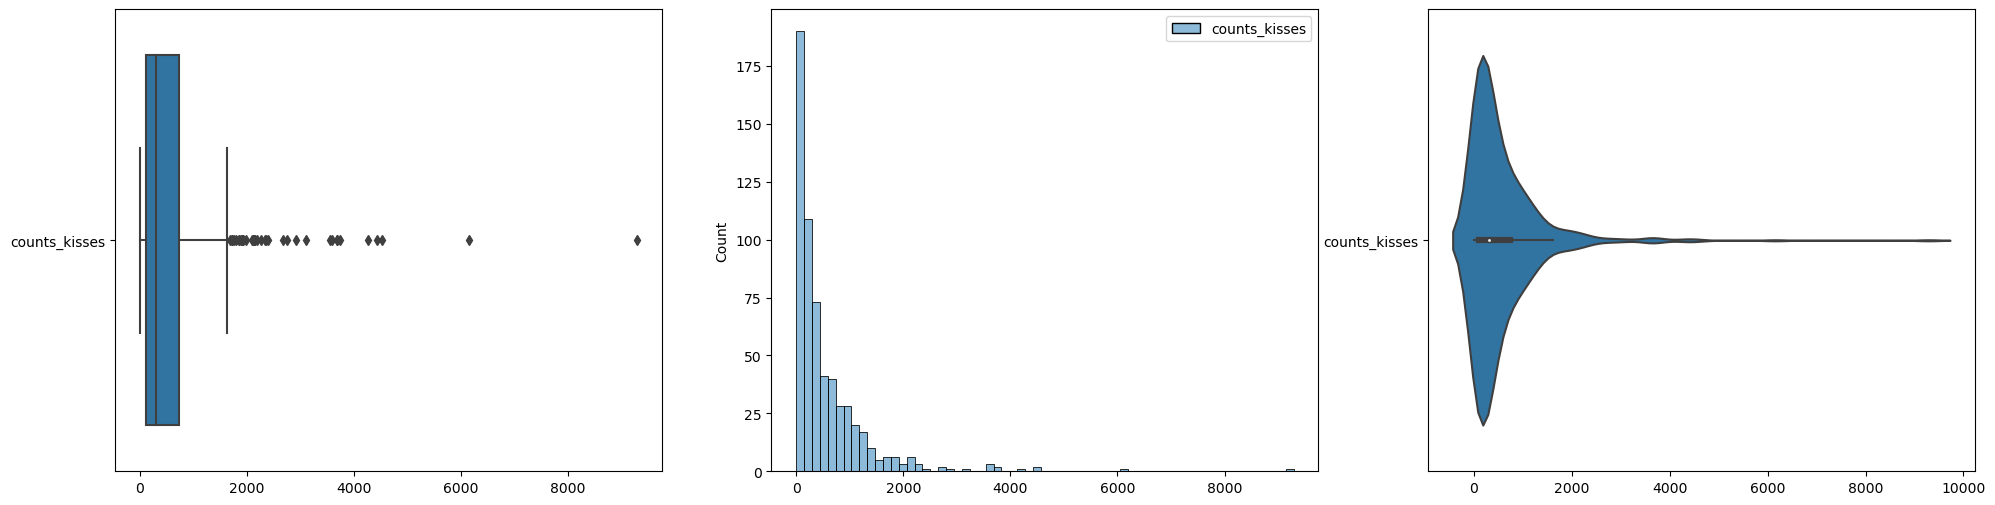

In [68]:
f, axes = plt.subplots(1, 3, figsize=(24, 6))
sb.boxplot(data = kisses_train, orient = "h", ax = axes[0])
sb.histplot(data = kisses_train, ax = axes[1])
sb.violinplot(data = kisses_train, orient = "h", ax = axes[2])

<Axes: xlabel='counts_kisses', ylabel='flirtInterests_chat'>

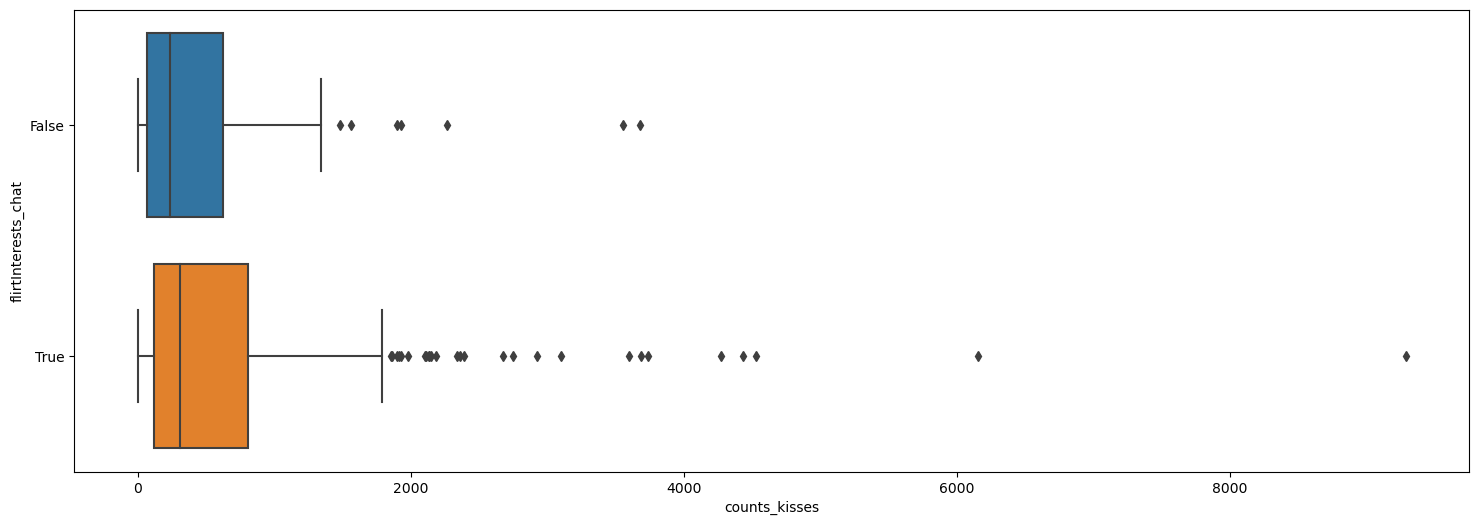

In [69]:
# Create a joint dataframe by concatenating Total and Legendary
trainDF = pd.concat([kisses_train, chat_train], axis = 1).reindex(kisses_train.index)

# Joint Boxplot of Total Train against Legendary Train
f = plt.figure(figsize=(18, 6))
sb.boxplot(x = "counts_kisses", y = "flirtInterests_chat", data = trainDF, orient = "h")

<Axes: xlabel='counts_kisses', ylabel='flirtInterests_chat'>

C:\Users\24119\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 13.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


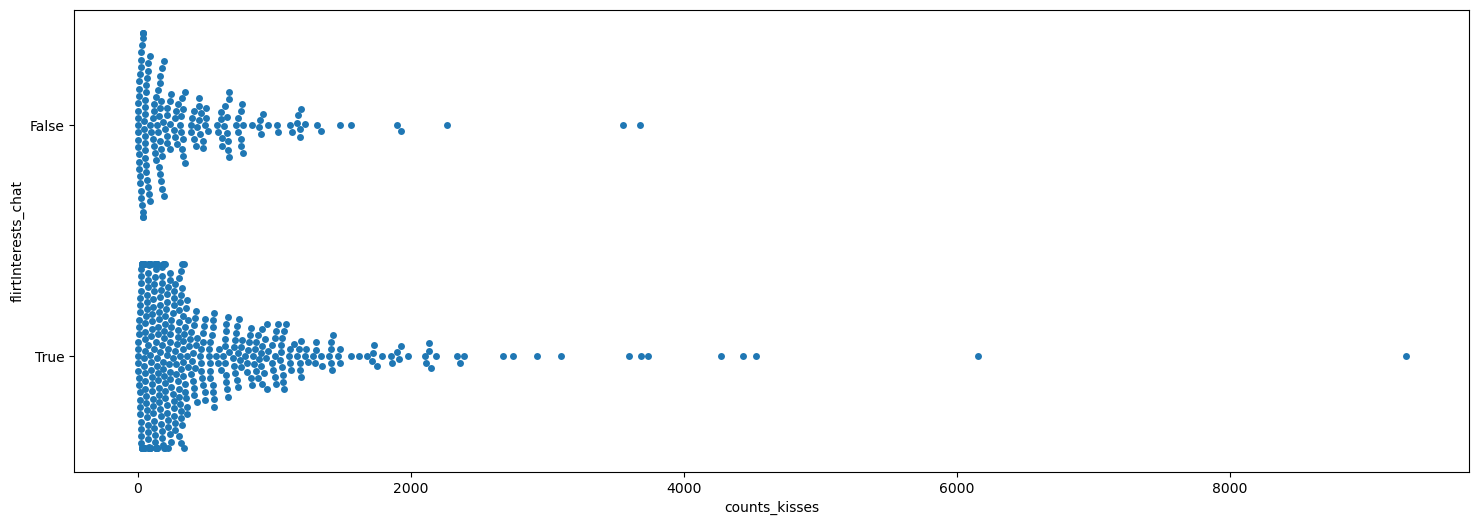

In [70]:
# Create a joint dataframe by concatenating Total and Legendary
trainDF = pd.concat([kisses_train, chat_train], axis = 1).reindex(kisses_train.index)

# Joint Swarmplot of Total Train against Legendary Train
f = plt.figure(figsize=(18, 6))
sb.swarmplot(x = "counts_kisses", y = "flirtInterests_chat", data = trainDF, orient = "h")

# 1.flirtInterests_chat and count_kisses classification tree

In [71]:
# Import Decision Tree Classifier model from Scikit-Learn
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree Classifier object
dectree = DecisionTreeClassifier(max_depth = 2)

In [72]:
dectree.fit(kisses_train, chat_train)

DecisionTreeClassifier(max_depth=2)

[Text(0.5, 0.8333333333333334, 'counts_kisses <= 68.0\ngini = 0.409\nsamples = 600\nvalue = [172, 428]\nclass = flirtInterests_chat'),
 Text(0.25, 0.5, 'counts_kisses <= 12.5\ngini = 0.489\nsamples = 106\nvalue = [45, 61]\nclass = flirtInterests_chat'),
 Text(0.125, 0.16666666666666666, 'gini = 0.472\nsamples = 21\nvalue = [13, 8]\nclass = Ordinary'),
 Text(0.375, 0.16666666666666666, 'gini = 0.469\nsamples = 85\nvalue = [32, 53]\nclass = flirtInterests_chat'),
 Text(0.75, 0.5, 'counts_kisses <= 780.0\ngini = 0.382\nsamples = 494\nvalue = [127, 367]\nclass = flirtInterests_chat'),
 Text(0.625, 0.16666666666666666, 'gini = 0.407\nsamples = 358\nvalue = [102, 256]\nclass = flirtInterests_chat'),
 Text(0.875, 0.16666666666666666, 'gini = 0.3\nsamples = 136\nvalue = [25, 111]\nclass = flirtInterests_chat')]

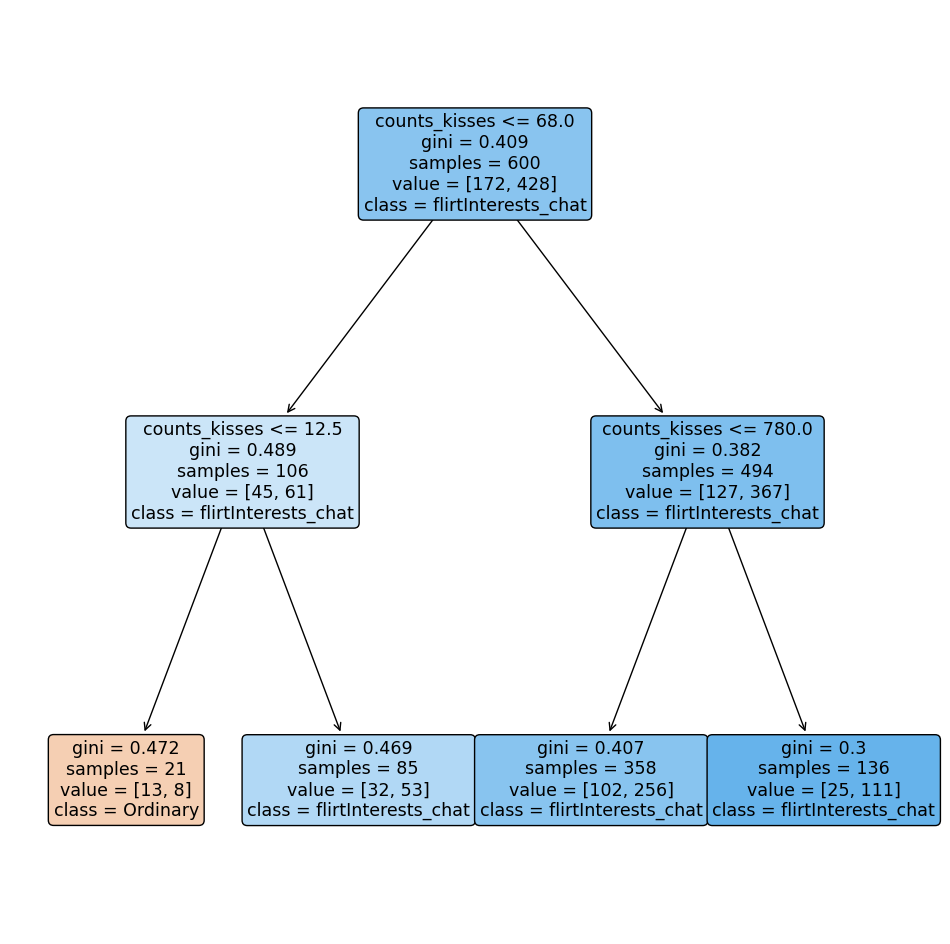

In [73]:
from sklearn.tree import plot_tree

f = plt.figure(figsize=(12,12))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=["counts_kisses"], 
          class_names=["Ordinary","flirtInterests_chat"])

Classification Accuracy 	: 0.7216666666666667


<Axes: >

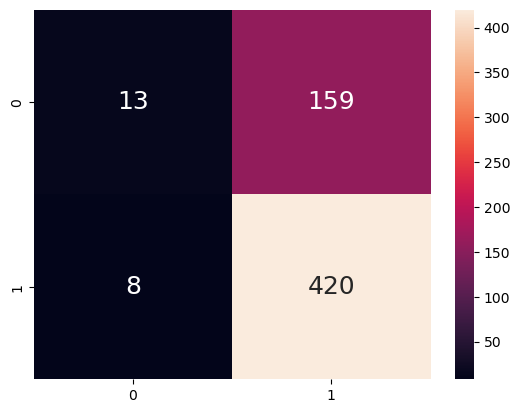

In [74]:
# Predict flirtinterests_chat corresponding to Counts_kisses Train
chat_train_pred = dectree.predict(kisses_train)

# Print the Classification Accuracy
print("Classification Accuracy \t:", dectree.score(kisses_train, chat_train))

# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(chat_train, chat_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Classification Accuracy 	: 0.61


<Axes: >

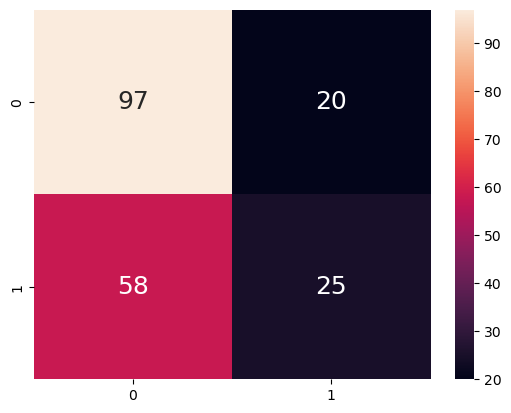

In [75]:
# Predict flirtinterests_chat corresponding to counts_kisses Test
chat_test_pred = dectree.predict(kisses_test)

# Print the Classification Accuracy
print("Classification Accuracy \t:", dectree.score(kisses_test, chat_test))

# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(chat_test, chat_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

# Random split

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6300772071164821

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.6126760563380281



<Axes: >

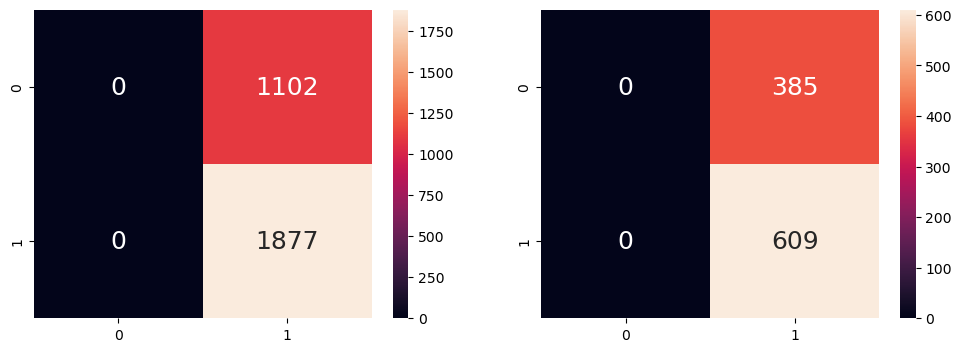

In [82]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Recall the Legendary-Total Dataset
chat = pd.DataFrame(lovoo_api['flirtInterests_chat'])  # Response
kisses = pd.DataFrame(lovoo_api['counts_kisses'])      # Predictor

# Split the Legendary-Total Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(kisses, chat, test_size = 0.25)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 2)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Legendary values corresponding to Total
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

[Text(0.5, 0.8333333333333334, 'counts_kisses <= 139.5\ngini = 0.47\nsamples = 2979\nvalue = [1123, 1856]\nclass = flirtInterests_chat'),
 Text(0.25, 0.5, 'counts_kisses <= 138.5\ngini = 0.478\nsamples = 2213\nvalue = [877, 1336]\nclass = flirtInterests_chat'),
 Text(0.125, 0.16666666666666666, 'gini = 0.478\nsamples = 2208\nvalue = [872, 1336]\nclass = flirtInterests_chat'),
 Text(0.375, 0.16666666666666666, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]\nclass = Ordinary'),
 Text(0.75, 0.5, 'counts_kisses <= 777.5\ngini = 0.436\nsamples = 766\nvalue = [246, 520]\nclass = flirtInterests_chat'),
 Text(0.625, 0.16666666666666666, 'gini = 0.448\nsamples = 635\nvalue = [215, 420]\nclass = flirtInterests_chat'),
 Text(0.875, 0.16666666666666666, 'gini = 0.361\nsamples = 131\nvalue = [31, 100]\nclass = flirtInterests_chat')]

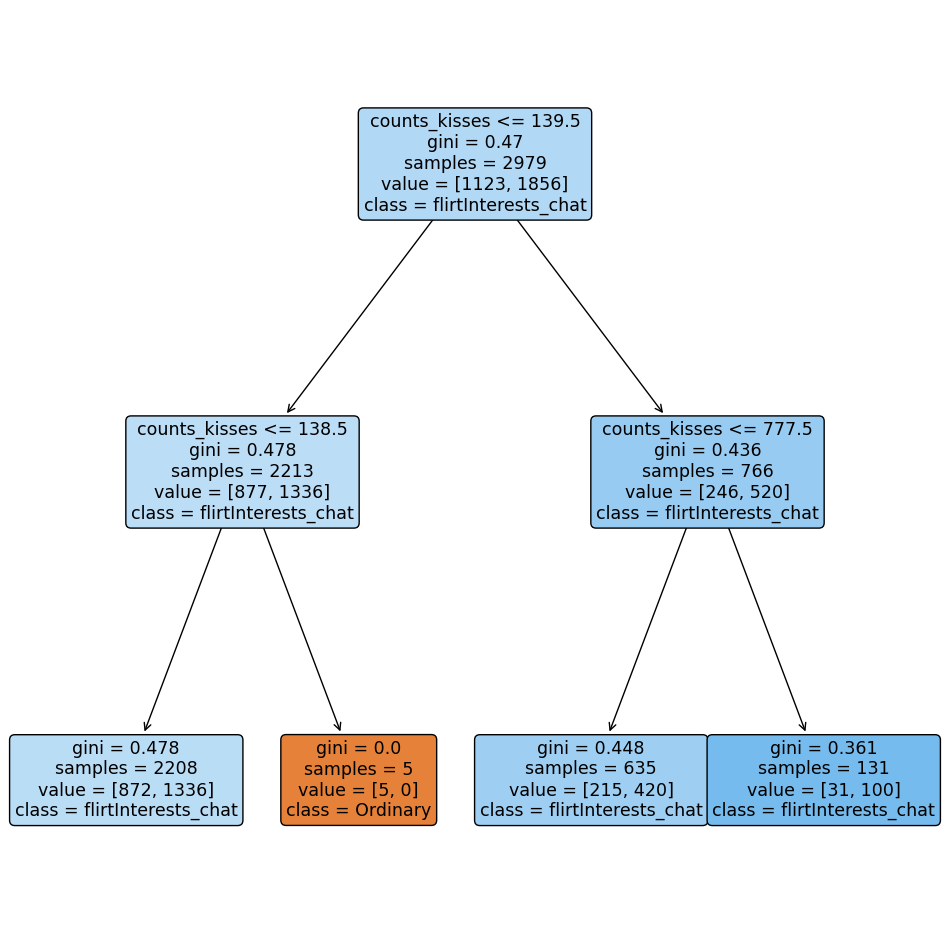

In [77]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(12,12))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=["counts_kisses"], 
          class_names=["Ordinary","flirtInterests_chat"])

# 2.flirtInterests_friends and count_kisses classification tree

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6347767707284323

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.6217303822937625



<Axes: >

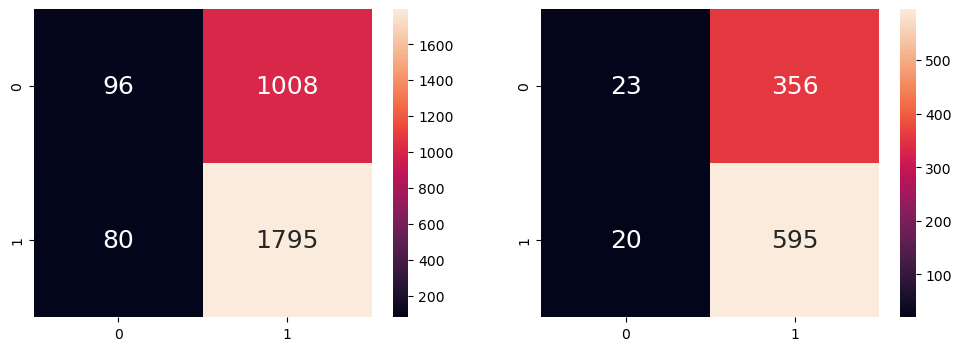

In [78]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Recall the Legendary-Total Dataset
friends = pd.DataFrame(lovoo_api['flirtInterests_friends'])  # Response
kisses = pd.DataFrame(lovoo_api['counts_kisses'])      # Predictor

# Split the Legendary-Total Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(kisses, friends, test_size = 0.25)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 2)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Legendary values corresponding to Total
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

[Text(0.4, 0.8333333333333334, 'counts_kisses <= 0.5\ngini = 0.467\nsamples = 2979\nvalue = [1104, 1875]\nclass = flirtInterests_friends'),
 Text(0.2, 0.5, 'gini = 0.498\nsamples = 172\nvalue = [92, 80]\nclass = Ordinary'),
 Text(0.6, 0.5, 'counts_kisses <= 3709.0\ngini = 0.461\nsamples = 2807\nvalue = [1012, 1795]\nclass = flirtInterests_friends'),
 Text(0.4, 0.16666666666666666, 'gini = 0.461\nsamples = 2803\nvalue = [1008, 1795]\nclass = flirtInterests_friends'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]\nclass = Ordinary')]

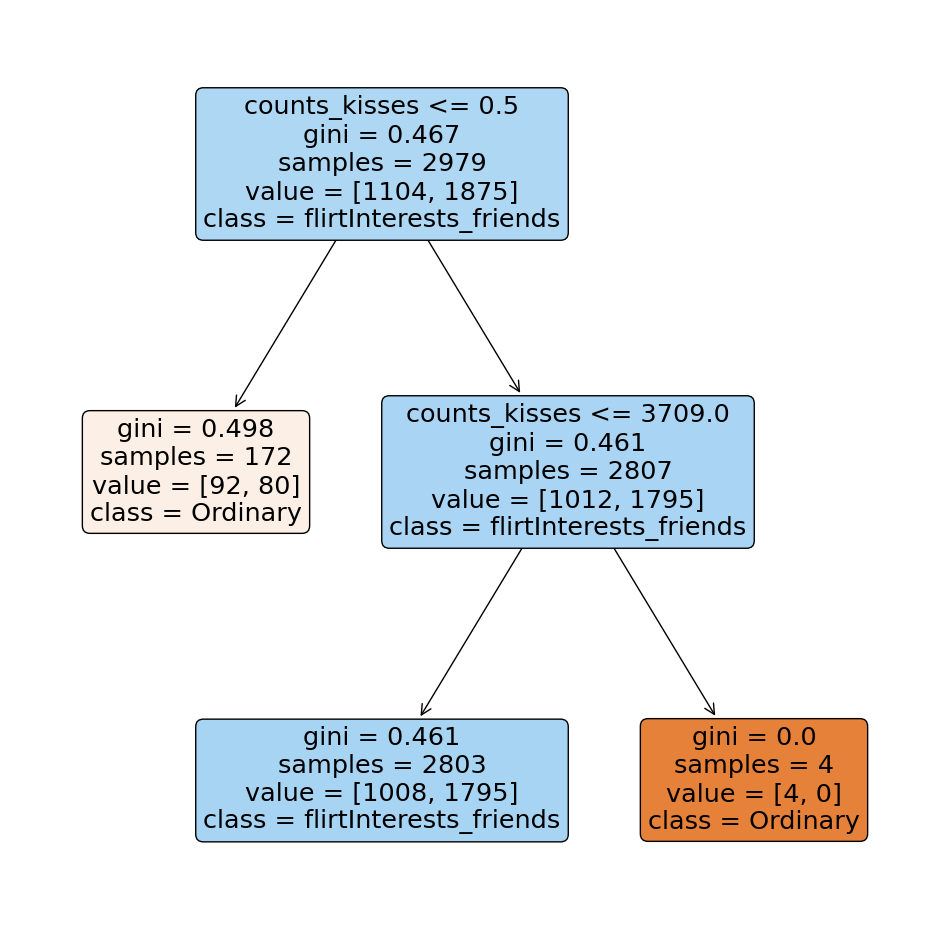

In [79]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(12,12))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=["counts_kisses"], 
          class_names=["Ordinary","flirtInterests_friends"])

# 3.flirtInterests_date and count_kisses classification tree

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6085934877475663

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.6317907444668008



<Axes: >

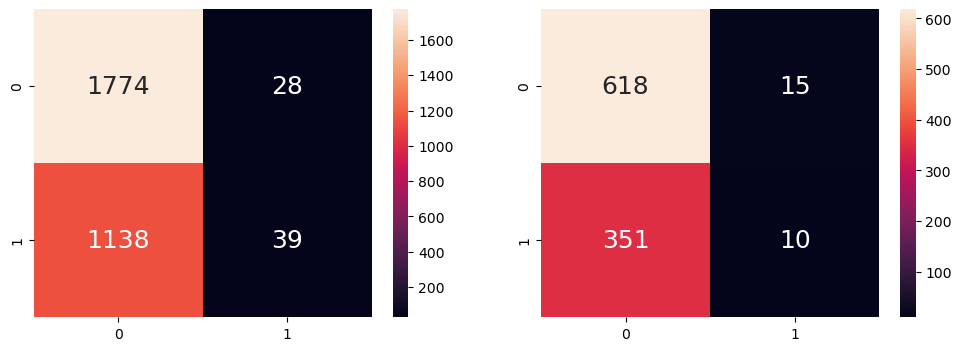

In [80]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Recall the Legendary-Total Dataset
date = pd.DataFrame(lovoo_api['flirtInterests_date'])  # Response
kisses = pd.DataFrame(lovoo_api['counts_kisses'])      # Predictor

# Split the Legendary-Total Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(kisses, date, test_size = 0.25)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 2)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Legendary values corresponding to Total
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

[Text(0.5, 0.8333333333333334, 'counts_kisses <= 1066.5\ngini = 0.478\nsamples = 2979\nvalue = [1802, 1177]\nclass = Ordinary'),
 Text(0.25, 0.5, 'counts_kisses <= 2.5\ngini = 0.476\nsamples = 2908\nvalue = [1771, 1137]\nclass = Ordinary'),
 Text(0.125, 0.16666666666666666, 'gini = 0.441\nsamples = 332\nvalue = [223, 109]\nclass = Ordinary'),
 Text(0.375, 0.16666666666666666, 'gini = 0.48\nsamples = 2576\nvalue = [1548, 1028]\nclass = Ordinary'),
 Text(0.75, 0.5, 'counts_kisses <= 4191.5\ngini = 0.492\nsamples = 71\nvalue = [31, 40]\nclass = flirtInterests_date'),
 Text(0.625, 0.16666666666666666, 'gini = 0.487\nsamples = 67\nvalue = [28, 39]\nclass = flirtInterests_date'),
 Text(0.875, 0.16666666666666666, 'gini = 0.375\nsamples = 4\nvalue = [3, 1]\nclass = Ordinary')]

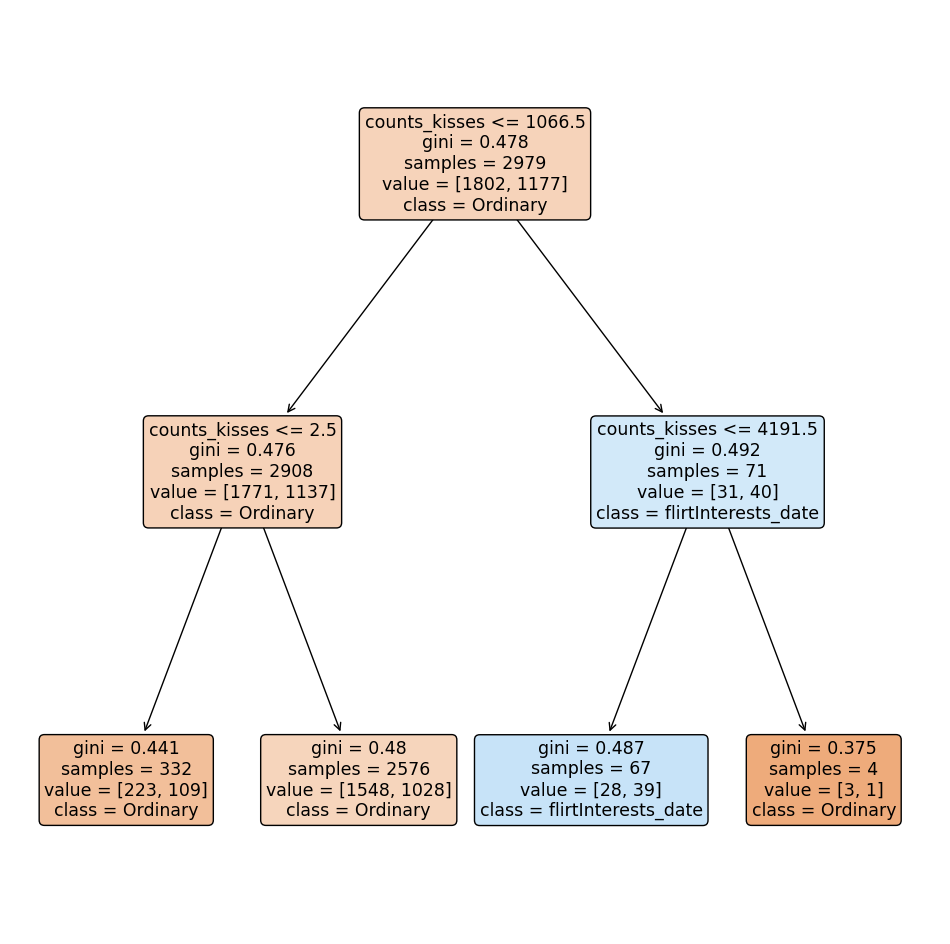

In [81]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(12,12))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=["counts_kisses"], 
          class_names=["Ordinary","flirtInterests_date"])